# Generation Time Data, Tables, Figures and Statistical tests

This notebook contains all the scripts coded to produce all the data, tables and figures and perform statistical tests in the *Different historical generation intervals in human populations inferred from Neanderthal fragment lengths and patterns of mutation accumulation* manuscript.

To be able to run all chunks below, you need to have in the same directory as this Jupyter notebook the following files:

- Data1_archaicfragments.txt

    This data is the collection of archaic fragments called in this manuscript for all Eurasian and American individuals in the SGDP data and 3 ancient human individuals ([Mallick S et al, 2016](https://doi.org/10.1038/nature18964)). It is provided in this GitHub page. To produce it we followed the steps described in the manuscript and detailed in https://github.com/LauritsSkov/Introgression-detection.

- Data2_mutation_spectrum.txt

    This data is the counts of the 96-mutation types (focal mutation ancestral and derived allele with it's 5' and 3' context) for each Eurasian and American individuals in the SGDP data. The counts are further subdivided per chromosome. Particularrities for the sex chromosomes are descrived in the manuscript. This data is provided in this GitHub page. To produce it we followed the steps described in the manuscript and detailed in https://github.com/MoiColl/TheGenerationTimeProject/tree/main/MutationAccumulation.

- CGenrichment.txt

    This data corresponds to the counts of C>G and nonC>G mutations in C>G enriched regions and nonC>G enriched regions (as described in [H Jónsson et al, 2017](https://doi.org/10.1038/nature24018) for all Eurasian and American individuals in the SGDP per chromosome. It is provided in this GitHub page. To produce it, we followed the steps described in the manuscript and detailed in https://github.com/MoiColl/TheGenerationTimeProject/tree/main/MutationAccumulation.

- SGDP.ind

    This is a modified list of the individuals used from the SGDP data ([Mallick S et al, 2016](https://doi.org/10.1038/nature18964)). Compared to the original list, we indicate the region of each individual instead of its population of origin. The original list can be downloaded as part of the SGDP dataset from https://sharehost.hms.harvard.edu/genetics/reich_lab/sgdp/cteam_lite/cteam_lite_public3.tar. We provide our modified version in https://github.com/MoiColl/TheGenerationTimeProject/blob/main/MutationAccumulation/SGDP.ind.

- Href.fa

    This is the human reference genome in fasta format provided in the SGDP data (https://sharehost.hms.harvard.edu/genetics/reich_lab/sgdp/cteam_lite/cteam_lite_public3.tar).

- name_lat_long.txt

    This is a a modified file from the original SGDP metadata file (https://sharehost.hms.harvard.edu/genetics/reich_lab/sgdp/SGDP_metadata.279public.21signedLetter.44Fan.samples.txt) with the selected columns corresponding to the individual name and corresponding latitude and longitude. 

- downsampled_WestEurasia.txt

    This is a file produced in this Jupyter notebook with a random list of 45 WestEurasia individuals. To reproduce the results form the manuscript, we recomend to keep the original file provided in this GitHub page.


- aau1043_DataS7.tsv and aau1043_DataS5_revision1_context.tsv

    This two files correspond to the metadata and a modified version of *de novo* mutations call files provided in [BV Halldorsson et al, 2019](https://doi.org/10.1126/science.aau1043) as suppementary data. The original aau1043_DataS5_revision1.tsv was modified such that aau1043_DataS5_revision1_context.tsv incorporated the mutational context (5' and 3' contiguous base pairs) annotated. The specific method is described in https://github.com/MoiColl/TheGenerationTimeProject/tree/main/MutationAccumulation.


<a name="HomeHome"></a>

## Contents

0. [ Library and packages ](#Lib)
1. [ Functions ](#Fun)
    + 1. [Python Functions](#Pyf)
    + 2. [R Functions](#Rfu)
2. [ Tables ](#Tab)
    + 1. [ Supplementary Tables ](#SubTab)
            - [ SI Table 1 ](#SupTab1)
            - [ SI Table 2 ](#SupTab2)
            - [ SI Table 3 ](#SupTab3)
                - [ Downsampling West Eurasian individuals ](#Down)
            - [ SI Table 4 ](#SupTab4)
            - [ SI Table 5 ](#SupTab5)
            - [ SI Table 6 ](#SupTab6)
            - [ SI Table 7 ](#SupTab7)
            - [ SI Table 8 ](#SupTab8)
            - [ SI Table 9 ](#SupTab9)
            - [ SI Table 10 ](#SupTab10)
    
3. [ Figures ](#Fig)
    + 1. [ Main figures ](#MaiFig)
        - [ Figure 1 ](#MaiFig1)
        - [ Figure 2 ](#MaiFig2)
        - [ Figure 3 ](#MaiFig3)
        - [ Figure 4 ](#MaiFig4)
    + 2. [ Extended Figures ](#ExtFig)
        - [ Extended Figure 1 ](#ExtFig1)
        - [ Extended Figure 2 ](#ExtFig2)
        - [ Extended Figure 3 ](#ExtFig3)
    + 3. [ Supplementary Figures ](#SupFig)
        - [ SI Figure 1 ](#SupFig1)
        - [ SI Figure 2 ](#SupFig2)
        - [ SI Figure 4 ](#SupFig4)
        - [ SI Figure 5 ](#SupFig5)
        - [ SI Figure 6 ](#SupFig6)
        - [ SI Figure 7 ](#SupFig7)

4. [ Statistical test ](#Sta)
    + 1. [ Difference average archaic fragment length among regions ](#Sta1)
    + 2. [ Difference mean number archaic fragments among regions ](#Sta2)
    + 3. [ Difference mean archaic sequence among regions ](#Sta3)
    + 4. [ Difference average overlapping archaic fragment length among West Eurasians and East Asians ](#Sta4)
    + 5. [ Difference accumulation of derived alleles among regions ](#Sta5)
    + 6. [ Difference accumulation of derived alleles among West Eurasians and East Asians ](#Sta6)
    + 7. [ Difference X-to-A ratio among regions ](#Sta7)
    + 8. [ Difference CGenrichment ratio among regions ](#Sta8)
    + 9. [ Difference accumulation of derived alleles on Y chromosome among regions ](#Sta9)

<a name="Lib"></a>
## 0. Library and packages


In [1]:
#python version = 3.8.3
import pandas as pd                    #version = 1.0.4
import numpy as np                     #version = 1.18.5
from rpy2.robjects import r, pandas2ri #version = 3.3.2
import os
from collections import defaultdict

%load_ext rpy2.ipython
pandas2ri.activate()

In [2]:
%%R

#Load Packages
library(ggplot2)  #r-ggplot2  version = 3.3.2
library(dplyr)    #r-dplyr    version = 1.4.4
library(tidyr)    #r-tidyr    version = 1.1.0
library(cowplot)  #r-cowplot  version = 1.0.0
library(stringr)  #r-stringr  version = 1.4.0
library(knitr)    #r-knitr    version = 1.22
library(maptools) #r-maptools version = 0.9_5
library(maps)     #r-maps     version = 3.3.0
library(ggridges) #r-ggridges version = 0.5.2
library(grid)     

#Options for dplyr summarise function
options(dplyr.summarise.inform = FALSE)

#Population colors
reg_colors <- c("WestEurasia" = "#0474bc", "SouthAsia" = "#804474", "CentralAsiaSiberia" = "#fcd337", "EastAsia" = "#34bc2c", "America" = "#fc4c3c")

#Theme set for all plots (Theme, font and font size)
theme_set(theme_light() + theme(axis.title   = element_text(family = "Helvetica", size = 7), axis.text   = element_text(family = "Helvetica", size = 5),
                                legend.title = element_text(family = "Helvetica", size = 5), legend.text = element_text(family = "Helvetica", size = 5)))


R[write to console]: Want to understand how all the pieces fit together? Read R for Data
Science: https://r4ds.had.co.nz/

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: 
********************************************************

R[write to console]: Note: As of version 1.0.0, cowplot does not change the

R[write to console]:   default ggplot2 theme anymore. To recover the previous

R[write to console]:   behavior, execute:
  theme_set(theme_cowplot())

R[write to console]: ********************************************************


R[write to console]: Loading required package: sp

R[write to console]: Checking rgeos availability: TRUE



<a name="Fun"></a>
## 1. Functions and Global Variables
<a name="Pyf"></a>
### A. Python Functions and Global Variables

In [3]:
regions   = ["WestEurasia", "SouthAsia", "America", "CentralAsiaSiberia", "EastAsia"]
muttypes9 = ["T>A", "T>C", "T>G", "C>A", "C>T", "C>G", "CpG>TpG", "C>T'", "TCC>TTC"]

In [4]:
#1
def bootstrap(arr, iterations = 100000):
    '''
    - Input:
        - arr        : numpy array with the values which are going to be bootstraped
        - iterations : number of bootstraps performed. Default = 10e5
    - Output:
        - list with two values: 
            - mean among all bootstraped means
            - se estimation as standard deviation among all the bootstraped means
    '''
    boot = []
    for i in range(iterations):
        boot.append(np.mean(np.random.choice(arr, arr.shape[0], replace = True)))
    return [np.mean(boot), np.std(boot)]

#2
def boot_perregion(df, regions, colname, iterations = 100000):
    '''
    - Input:
        - df         : pandas DataFrame with the statistic that has to be bootstraped (colname) for and a column with the regions of each individual (reg)
        - colname    : column name of the df that will be bootstraped
        - iterations : number of bootstraps performed. Default = 10e5
    - Output
        - numpy array with the bootstraped values for the statistic for each region
    '''
    boot_region = []
    for reg in regions:
        boot_region.append(bootstrap(df[df["reg"] == reg][colname]))
    return np.array(boot_region)

#3
def two_group_diff(df):
    '''
    - Input:
        - df  : pandas Dataframe with two columns:
            - group : the values for which the data is going to be distributed in groups
            - value : values for which the difference between the groups' means is going to be computed
    - Output:
        - difference between the group means
    '''
    means = df.groupby('group', as_index=False, group_keys=False)["value"].agg('mean')
    return means["value"][1] - means["value"][0]

#4
def permutation_two_group_diff(df, n_perm = 100000):
    '''
    - Input:
        - df  : pandas Dataframe with two columns:
            - group : the values for which the data is going to be distributed in groups
            - value : values for which the difference between the groups' means is going to be computed
    - Output:
        - diffobs : observed difference between the means of the two groups
        - p       : number of permutations with the same difference value or more extreme than the obseved (diffobs)
    '''
    diffobs = two_group_diff(df)
    p       = 0
    for i in range(n_perm):
        shuffled = pd.DataFrame({"group" : df["group"], "value" : np.random.permutation(df["value"].values)})
        if two_group_diff(shuffled) >= diffobs:
            p += 1

    return diffobs, min(p, n_perm-p)

#5
def fstat(df):
    '''
    - Input:
        - df  : pandas Dataframe with two columns:
            - group : the values for which the data is going to be distributed in groups
            - value : values for which the F statisting among groups is going to be computed
    - Output:
        - F statistic among groups
    '''
    k   = len(pd.unique(df["group"]))
    dfg = k-1
    
    n = df.shape[0]
    dfe = n-k
    
    grouped = df.groupby('group', as_index=False, group_keys=False)["value"].agg(['mean', "count", "var"])
    
    SSg =  (((grouped["mean"]-df["value"].mean())**2)*grouped["count"]).sum()  
    SSe = (grouped["var"]*(grouped["count"]-1)).sum()
    
    MSg = SSg/dfg
    MSe = SSe/dfe
    
    F = MSg/MSe

    return F
#6  
def permutation_fstat(df, n_perm = 100000):
    '''
    - Input:
        - df  : pandas Dataframe with two columns:
            - group : the values for which the data is going to be distributed in groups
            - value : values for which the F statisting among groups is going to be computed
    - Output:
        - Fobs : observed F statistic among the groups
        - p    : number of permutations with the same F statistic value or more extreme than the obseved (Fobs)
    '''
    Fobs = fstat(df)
    p    = 0
    for i in range(n_perm):
        shuffled = pd.DataFrame({"group" : df["group"], "value" : np.random.permutation(df["value"].values)})
        if fstat(shuffled) >= Fobs:
            p += 1

    return Fobs, p

<a name="Rfu"></a>
### B. R Functions

In [5]:
%%R

#1.
archaicfragmentstatisticsperind <- function(){
    
    #Returns a dataframe with the different statistics about the archaic fragments in the extant individuals of the SGDP data
    
    read.table("Data1_archaicfragments.txt", head = T)  %>% 
        filter(region %in% c("WestEurasia", "SouthAsia", "America", "CentralAsiaSiberia", "EastAsia")) %>%
        group_by(name, region) %>%
        summarize(num_frag = n(), arch_seq = sum(length), mean_len = mean(length)) %>%
        mutate(region = factor(region, levels = c("WestEurasia", "SouthAsia", "America", "CentralAsiaSiberia", "EastAsia")))
}


#2. 
mutation_spectrum_mean_len_perind <- function(){
    
    #Returns a dataframe with the mean fragment length and number of mutations of each mutation type per individual in the SGDP data
    
    read.table("Data2_mutation_spectrum.txt", header = T) %>% 
            filter(chrom != "X", chrom != "Y") %>%
            mutate(mutation = ifelse(paste(fiv, anc, thr, der,  sep = "") == "TCCT",  "TCCzTTC",  
                                        ifelse(paste(anc, thr, der, sep = "") == "CGT", "CpGzTpG", paste(anc, der, sep = "z")))) %>% 

            group_by(ind, reg, mutation) %>%
            summarise(counts = sum(counts)) %>% 
            spread(mutation, counts) %>%
            mutate(CzTt = CpGzTpG+CzT+TCCzTTC) %>%
            gather("mutation", "counts", 3:11) %>%
            mutate(mutation = str_replace(mutation, "z", ">"),
                   mutation = ifelse(mutation == "C>T", "C>T'", mutation),
                   mutation = ifelse(mutation == "C>Tt", "C>T", mutation),
                   total    = ifelse(mutation %in% c("C>T'", "CpG>TpG", "TCC>TTC"), 0, counts)) %>%
            group_by(ind, reg) %>%
            mutate(total = sum(total)) %>%
            ungroup() %>%
            mutate(frac = counts/total) %>%
            mutate(mutation = factor(mutation, levels = c("T>A", "T>C", "T>G", "C>A", "C>T", "C>G", "C>T'", "CpG>TpG", "TCC>TTC"))) %>%
            full_join(archaicfragmentstatisticsperind() %>% select(ind = name, mean_len), by = c("ind"))
}

#3. 
deCODE_mutation_spectrum_mean_age <- function(min_probands = 2, max_age_diff = 100){
    
    #It outputs the fraction for each mutation type per group of individuals with the same mean parental age
    #The data can be filtered for difference in maternal to paternal age and the minimum number of probands for a particular age
    
    merge(read.table("aau1043_DataS5_revision1_context.tsv", header = T, sep = "\t"),
          read.table("aau1043_DataS7.tsv", header = T, sep = "\t"), by = c("Proband_id")) %>%
        filter(indel == 0) %>%
        mutate(age = (Mother_age+Father_age)/2,
               age_diff = abs(Mother_age-Father_age),
               mutation = ifelse(paste(fiv, ref, thr, alt,  sep = "") == "TCCT",  "TCCzTTC",  
                                            ifelse(paste(ref, thr, alt, sep = "") == "CGT", "CpGzTpG", paste(ref, alt, sep = "z")))) %>%
        filter(age_diff < max_age_diff) %>%
        group_by(Proband_id, age, mutation) %>%
        summarise(counts = n()) %>% 
        spread(mutation, counts, fill = 0) %>%
        mutate(CzTt = CpGzTpG+CzT+TCCzTTC) %>%
        group_by(age) %>%
        mutate(n_probands = n()) %>%
        ungroup() %>%
        gather("mutation", "counts", 3:11) %>%
        mutate(mutation = str_replace(mutation, "z", ">"),
               mutation = ifelse(mutation == "C>T", "C>T'", mutation),
               mutation = ifelse(mutation == "C>Tt", "C>T", mutation)) %>%

        group_by(age, n_probands, mutation) %>%
        summarise(counts = sum(counts)) %>%
        ungroup() %>%
        mutate(total  = ifelse(mutation %in% c("C>T'", "CpG>TpG", "TCC>TTC"), 0, counts)) %>%
        group_by(age, n_probands) %>%
        mutate(total = sum(total),
               frac  = counts/total) %>%
        ungroup() %>%
        filter(n_probands >= min_probands) 
}

[<img src="arrow.png" width="100" style="float: left;">](#HomeHome) &nbsp;

&nbsp;

<a name="Tab"></a>
## 2. Tables

<a name="SubTab"></a>
### A. Supplementary Tables

<a name="SupTab1"></a>
#### SI Table 1


In [107]:
archfrag_perind = %R archaicfragmentstatisticsperind() %>% rename(reg = region)
archfrag_perind

,name,reg,num_frag,arch_seq,mean_len
1,S_Abkhasian-1,WestEurasia,961,70614000,73479.708637
2,S_Abkhasian-2,WestEurasia,921,67290000,73061.889251
3,S_Adygei-1,WestEurasia,1038,78044000,75186.897881
4,S_Adygei-2,WestEurasia,1050,79456000,75672.380952
5,S_Albanian-1,WestEurasia,963,75458000,78357.217030
...,...,...,...,...,...
198,S_Yemenite_Jew-2,WestEurasia,943,70898000,75183.457052
199,S_Yi-1,EastAsia,1049,84272000,80335.557674
200,S_Yi-2,EastAsia,1181,97466000,82528.365792
201,S_Zapotec-1,America,1153,87130000,75568.083261


In [108]:
archfrag_perreg = defaultdict(lambda : None)

for stat in ["num_frag", "arch_seq", "mean_len"]:
    archfrag_perreg[stat] = boot_perregion(archfrag_perind, regions,  stat)

In [109]:
archfrag_perreg_df = pd.DataFrame({
    "region"        : regions,
    "n_samples"     : [np.sum((archfrag_perind["reg"] == reg)) for reg in regions],
    "n_frag_mean"   : archfrag_perreg["num_frag"][:, 0],
    "n_frag_se"     : archfrag_perreg["num_frag"][:, 1],
    "arch_seq_mean" : archfrag_perreg["arch_seq"][:, 0],
    "arch_seq_se"   : archfrag_perreg["arch_seq"][:, 1],
    "mean_len_mean" : archfrag_perreg["mean_len"][:, 0],
    "mean_len_se"   : archfrag_perreg["mean_len"][:, 1]
})

archfrag_perreg_df.to_csv("SITab1.txt", sep='\t', index=False)

archfrag_perreg_df

,region,n_samples,n_frag_mean,n_frag_se,arch_seq_mean,arch_seq_se,mean_len_mean,mean_len_se
0,WestEurasia,71,980.952583,6.932549,7.213187e+07,7.498916e+05,73450.672430,374.989522
1,SouthAsia,39,1122.960003,11.263857,8.456577e+07,1.131449e+06,75221.513967,412.066415
2,America,20,1078.852535,10.193831,8.632316e+07,8.025245e+05,80058.627617,561.995101
3,CentralAsiaSiberia,27,1133.219880,8.860716,9.242688e+07,9.430960e+05,81542.974836,462.111490
4,EastAsia,45,1161.569479,6.712706,9.555065e+07,7.099140e+05,82259.468314,400.587517



<a name="SupTab2"></a>
#### SI Table 2


In [110]:
archfrag_perind = pd.read_csv("Data1_archaicfragments.txt", sep = "\t")
archfrag_perind

,name,region,chrom,start,end,length,MeanProb,snps,Altai,Denisova,Vindija
0,S_Lezgin-1,WestEurasia,1,3425000,3450000,25000,0.896726,13,11,1,10
1,S_Lezgin-1,WestEurasia,1,3586000,3600000,14000,0.857020,8,0,0,0
2,S_Lezgin-1,WestEurasia,1,7141000,7159000,18000,0.582438,6,0,0,0
3,S_Lezgin-1,WestEurasia,1,7585000,7593000,8000,0.576098,5,0,0,0
4,S_Lezgin-1,WestEurasia,1,14022000,14138000,116000,0.945749,29,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
220667,Ust_ishim,Ust_ishim,X,52874000,52938000,64000,0.705496,4,0,0,0
220668,Ust_ishim,Ust_ishim,X,90252000,90323000,71000,0.634501,3,0,0,1
220669,Ust_ishim,Ust_ishim,X,103669000,103683000,14000,0.514657,1,0,0,0
220670,Ust_ishim,Ust_ishim,X,122053000,122224000,171000,0.938437,19,0,0,0


In [111]:
archfrag_perancsamp = []
samples = ["Ust_ishim", "Loschbour", "Stuttgart"]
for name in samples:
    archfrag_perancsamp.append(bootstrap(archfrag_perind[archfrag_perind["name"] == name]["length"]))
archfrag_perancsamp = np.array(archfrag_perancsamp)

In [112]:
archfrag_perancsamp_df = pd.DataFrame({
    "samples"  : samples,
    "n_frag"   : [np.sum((archfrag_perind["name"] == name)) for name in samples],
    "arch_seq" : [np.sum(archfrag_perind[archfrag_perind["name"] == name]["length"])         for name in samples],
    "len_mean" : archfrag_perancsamp[:, 0],
    "len_se"   : archfrag_perancsamp[:, 1]
})

archfrag_perancsamp_df.to_csv("SITab2.txt", sep='\t', index=False)

archfrag_perancsamp_df

,samples,n_frag,arch_seq,len_mean,len_se
0,Ust_ishim,763,134360000,176079.179895,12298.828401
1,Loschbour,921,75757000,82245.209034,3064.343124
2,Stuttgart,1101,85950000,78058.373824,2720.517586


<a name="SupTab3"></a>
#### SI Tab 3

<a name="Down"></a>
#### Downsampling West Eurasian individuals

In [230]:
if not os.path.isfile('downsampled_WestEurasia.txt'):
    (pd.read_csv("SGDP.ind", sep = "\t", names = ["ind", "sex", "reg"])
         .query("reg == 'WestEurasia'")
         .sample(n=45)["ind"]
         .sort_values()
         .to_csv("downsampled_WestEurasia.txt", sep='\t', index=False, header = False))
    
pd.read_csv("downsampled_WestEurasia.txt", sep = "\t")

,S_Abkhasian-1
0,S_Adygei-1
1,S_Adygei-2
2,S_Albanian-1
3,S_Armenian-1
4,S_Armenian-2
5,S_Basque-1
6,S_Basque-2
7,S_BedouinB-1
8,S_BedouinB-2
9,S_Bergamo-1


In [254]:
%%bash

egrep -f downsampled_WestEurasia.txt Data1_archaicfragments.txt > archaicfragments_WE.txt
egrep "EastAsia" Data1_archaicfragments.txt > archaicfragments_EA.txt

Total archaic sequence in WestEurasia

In [255]:
%%bash

awk '{print $3"\t"$4"\t"$5}' archaicfragments_WE.txt | bedtools sort | bedtools merge > archaicfragments_joined_WE.bed 

awk '{sum = sum+($3-$2)}END{print sum}' archaicfragments_joined_WE.bed

866945000


Total archaic sequence in EastAsia

In [256]:
%%bash

awk '{print $3"\t"$4"\t"$5}' archaicfragments_EA.txt | bedtools sort | bedtools merge > archaicfragments_joined_EA.bed 

awk '{sum = sum+($3-$2)}END{print sum}' archaicfragments_joined_EA.bed

916369000


Shared archaic sequence between East Asia and West Eurasia

In [257]:
%%bash

bedtools intersect -a archaicfragments_joined_WE.bed -b archaicfragments_joined_EA.bed  > archaicfragments_shared_WEEA.bed

awk '{sum = sum+($3-$2)}END{print sum}' archaicfragments_shared_WEEA.bed

485255000


In [319]:
archfrag_sharedprivateall_joined_perreg_df = pd.DataFrame({
    "region"        : ["WestEurasia", "EastAsia"]*3,
    "n_samples"     : [np.sum((archfrag_shared_perind["reg"] == reg)) for reg in two_regions]*3,
    "type"          : ["Shared", "Shared", "Private", "Private", "All", "All"],
    "arch_seq"      : [485255000, 485255000, 866945000-485255000, 916369000-485255000, 866945000, 916369000]
})

archfrag_sharedprivateall_joined_perreg_df.sort_values(["region"], ascending = False).to_csv("SITab3.txt", sep='\t', index=False)

archfrag_sharedprivateall_joined_perreg_df.sort_values(["region"], ascending = False)

,region,n_samples,type,arch_seq
0,WestEurasia,45,Shared,485255000
2,WestEurasia,45,Private,381690000
4,WestEurasia,45,All,866945000
1,EastAsia,45,Shared,485255000
3,EastAsia,45,Private,431114000
5,EastAsia,45,All,916369000


<a name="SupTab4"></a>
#### SI Tab 4

Shared individual archaic fragments

In [354]:
%%bash

head archaicfragments_ind_all_WEEA.txt

name	region	chrom	start	end	length	MeanProb	snps	Altai	Denisova	Vindija
S_Ami-1	EastAsia	1	842000	873000	31000	0.90220536621	13	0	0	4
S_Ami-1	EastAsia	1	1544000	1569000	25000	0.732672810404	6	3	0	0
S_Ami-1	EastAsia	1	2781000	2801000	20000	0.910329936978	14	9	0	9
S_Ami-1	EastAsia	1	3165000	3242000	77000	0.864463473708	28	17	4	16
S_Ami-1	EastAsia	1	3350000	3404000	54000	0.906470402449	18	8	1	7
S_Ami-1	EastAsia	1	3540000	3593000	53000	0.934327773917	14	4	2	4
S_Ami-1	EastAsia	1	3794000	3860000	66000	0.840709732395	12	4	0	0
S_Ami-1	EastAsia	1	4304000	4355000	51000	0.855079679346	12	9	9	6
S_Ami-1	EastAsia	1	10837000	10876000	39000	0.892812113686	13	0	0	0


In [358]:
%%bash

bedtools intersect -u -a <(awk '{print $3"\t"$4"\t"$5"\t"$1"\t"$2"\t"$9"\t"$10"\t"$11}' archaicfragments_WE.txt) -b archaicfragments_joined_EA.bed \
    | awk 'BEGIN{print "name\tregion\tchrom\tstart\tend\tlength\tAltai\tDenisova\tVindija"}{print $4"\t"$5"\t"$1"\t"$2"\t"$3"\t"$3-$2"\t"$6"\t"$7"\t"$8}' > archaicfragments_ind_shared_WEEA.txt

bedtools intersect -u -a <(awk '{print $3"\t"$4"\t"$5"\t"$1"\t"$2"\t"$9"\t"$10"\t"$11}' archaicfragments_EA.txt) -b archaicfragments_joined_WE.bed \
    | awk '{print $4"\t"$5"\t"$1"\t"$2"\t"$3"\t"$3-$2"\t"$6"\t"$7"\t"$8}' >> archaicfragments_ind_shared_WEEA.txt

In [359]:
archfrag_shared_perind = %R read.table("archaicfragments_ind_shared_WEEA.txt", header = T) %>% group_by(name, region) %>% summarize(num_frag = n(), arch_seq = sum(length), mean_len = mean(length)) %>% rename(reg = region) %>% ungroup()
archfrag_shared_perind

,name,reg,num_frag,arch_seq,mean_len
1,S_Abkhasian-1,WestEurasia,758,60736000,80126.649077
2,S_Adygei-1,WestEurasia,792,64701000,81693.181818
3,S_Adygei-2,WestEurasia,820,67194000,81943.902439
4,S_Albanian-1,WestEurasia,749,64438000,86032.042724
5,S_Ami-1,EastAsia,883,78023000,88361.268403
...,...,...,...,...,...
86,S_Xibo-1,EastAsia,928,84318000,90859.913793
87,S_Xibo-2,EastAsia,907,81920000,90319.735391
88,S_Yemenite_Jew-1,WestEurasia,685,50541000,73782.481752
89,S_Yi-1,EastAsia,810,72125000,89043.209877


In [290]:
archfrag_shared_perreg = defaultdict(lambda : None)
two_regions = ["WestEurasia", "EastAsia"]

for stat in ["num_frag", "arch_seq", "mean_len"]:
    archfrag_shared_perreg[stat] = boot_perregion(archfrag_shared_perind, two_regions, stat)

Private individual archaic fragments

In [293]:
%%bash

bedtools intersect -v -a <(awk '{print $3"\t"$4"\t"$5"\t"$1"\t"$2}' archaicfragments_WE.txt) -b archaicfragments_joined_EA.bed \
    | awk 'BEGIN{print "name\tregion\tchrom\tstart\tend\tlength"}{print $4"\t"$5"\t"$1"\t"$2"\t"$3"\t"$3-$2}' > archaicfragments_ind_private_WEEA.txt

bedtools intersect -v -a <(awk '{print $3"\t"$4"\t"$5"\t"$1"\t"$2}' archaicfragments_EA.txt) -b archaicfragments_joined_WE.bed \
    | awk '{print $4"\t"$5"\t"$1"\t"$2"\t"$3"\t"$3-$2}' >> archaicfragments_ind_private_WEEA.txt

In [298]:
archfrag_private_perind = %R read.table("archaicfragments_ind_private_WEEA.txt", header = T) %>% group_by(name, region) %>% summarize(num_frag = n(), arch_seq = sum(length), mean_len = mean(length)) %>% rename(reg = region) %>% ungroup()
archfrag_private_perind

,name,reg,num_frag,arch_seq,mean_len
1,S_Abkhasian-1,WestEurasia,203,9878000,48660.098522
2,S_Adygei-1,WestEurasia,246,13343000,54239.837398
3,S_Adygei-2,WestEurasia,230,12262000,53313.043478
4,S_Albanian-1,WestEurasia,214,11020000,51495.327103
5,S_Ami-1,EastAsia,255,13072000,51262.745098
...,...,...,...,...,...
86,S_Xibo-1,EastAsia,228,12974000,56903.508772
87,S_Xibo-2,EastAsia,218,13751000,63077.981651
88,S_Yemenite_Jew-1,WestEurasia,288,16806000,58354.166667
89,S_Yi-1,EastAsia,239,12147000,50824.267782


In [299]:
archfrag_private_perreg = defaultdict(lambda : None)

for stat in ["num_frag", "arch_seq", "mean_len"]:
    archfrag_private_perreg[stat] = boot_perregion(archfrag_private_perind, two_regions, stat)

All individual archaic fragments

In [304]:
%%bash

head -n 1 Data1_archaicfragments.txt > archaicfragments_ind_all_WEEA.txt
cat archaicfragments_EA.txt archaicfragments_WE.txt >> archaicfragments_ind_all_WEEA.txt

In [306]:
archfrag_all_perind = %R read.table("archaicfragments_ind_all_WEEA.txt", header = T) %>% group_by(name, region) %>% summarize(num_frag = n(), arch_seq = sum(length), mean_len = mean(length)) %>% rename(reg = region) %>% ungroup()
archfrag_all_perind

,name,reg,num_frag,arch_seq,mean_len
1,S_Abkhasian-1,WestEurasia,961,70614000,73479.708637
2,S_Adygei-1,WestEurasia,1038,78044000,75186.897881
3,S_Adygei-2,WestEurasia,1050,79456000,75672.380952
4,S_Albanian-1,WestEurasia,963,75458000,78357.217030
5,S_Ami-1,EastAsia,1138,91095000,80048.330404
...,...,...,...,...,...
86,S_Xibo-1,EastAsia,1156,97292000,84162.629758
87,S_Xibo-2,EastAsia,1125,95671000,85040.888889
88,S_Yemenite_Jew-1,WestEurasia,973,67347000,69215.827338
89,S_Yi-1,EastAsia,1049,84272000,80335.557674


In [307]:
archfrag_all_perreg = defaultdict(lambda : None)

for stat in ["num_frag", "arch_seq", "mean_len"]:
    archfrag_all_perreg[stat] = boot_perregion(archfrag_all_perind, two_regions, stat)

In [320]:
archfrag_sharedprivateall_individual_perreg_df = pd.DataFrame({
    "region"        : two_regions*3,
    "n_samples"     : [np.sum((archfrag_shared_perind["reg"] == reg)) for reg in two_regions]*3,
    "type"          : ["Shared", "Shared", "Private", "Private", "All", "All"],
    "n_frag_mean"   : list(archfrag_shared_perreg["num_frag"][:, 0]) + list(archfrag_private_perreg["num_frag"][:, 0]) + list(archfrag_all_perreg["num_frag"][:, 0]),
    "n_frag_se"     : list(archfrag_shared_perreg["num_frag"][:, 1]) + list(archfrag_private_perreg["num_frag"][:, 1]) + list(archfrag_all_perreg["num_frag"][:, 1]),
    "arch_seq_mean" : list(archfrag_shared_perreg["arch_seq"][:, 0]) + list(archfrag_private_perreg["arch_seq"][:, 0]) + list(archfrag_all_perreg["arch_seq"][:, 0]),
    "arch_seq_se"   : list(archfrag_shared_perreg["arch_seq"][:, 1]) + list(archfrag_private_perreg["arch_seq"][:, 1]) + list(archfrag_all_perreg["arch_seq"][:, 1]),
    "mean_len_mean" : list(archfrag_shared_perreg["mean_len"][:, 0]) + list(archfrag_private_perreg["mean_len"][:, 0]) + list(archfrag_all_perreg["mean_len"][:, 0]),
    "mean_len_se"   : list(archfrag_shared_perreg["mean_len"][:, 1]) + list(archfrag_private_perreg["mean_len"][:, 1]) + list(archfrag_all_perreg["mean_len"][:, 1])
})

archfrag_sharedprivateall_individual_perreg_df.sort_values(["region"], ascending = False).to_csv("SITab4.txt", sep='\t', index=False)

archfrag_sharedprivateall_individual_perreg_df.sort_values(["region"], ascending = False)

,region,n_samples,type,n_frag_mean,n_frag_se,arch_seq_mean,arch_seq_se,mean_len_mean,mean_len_se
0,WestEurasia,45,Shared,756.245783,9.442278,5.988407e+07,956141.456725,79064.228335,476.251502
2,WestEurasia,45,Private,221.554625,2.850735,1.147696e+07,241202.881855,51734.202457,741.880534
4,WestEurasia,45,All,977.743020,9.751946,7.135619e+07,993646.474926,72876.727298,443.353096
1,EastAsia,45,Shared,913.777850,5.076751,8.172263e+07,585599.954798,89446.911797,477.611800
3,EastAsia,45,Private,247.797823,3.765804,1.382742e+07,250724.720215,55785.715212,575.350791
5,EastAsia,45,All,1161.538354,6.692737,9.554765e+07,709434.277748,82258.976278,401.976909


<a name="SupTab5"></a>
#### SI Tab 5

In [330]:
%%bash

awk '{sum = sum + ($3-$2)}END{print sum}' archaicfragments_joined_EA.bed 

916369000


In [ ]:
8 = snps
9 = ALtai
10 = Denisova
11 = Vindija

In [347]:
%%bash

egrep "WestEurasia" archaicfragments_ind_all_WEEA.txt \
    | awk '{print $3"\t"$4"\t"$5}'  \
    | bedtools sort \
    | bedtools merge \
    | awk '{sum = sum + $3-$2}END{print sum}'

egrep "WestEurasia" archaicfragments_ind_all_WEEA.txt \
    | awk '{if($10 > $9 && $10 > $11){print $3"\t"$4"\t"$5}}'  \
    | bedtools sort \
    | bedtools merge \
    | awk '{sum = sum + $3-$2}END{print sum}'

egrep "WestEurasia" archaicfragments_ind_all_WEEA.txt \
    | awk '{if($10 <= $9 || $10 <= $11 || $10 == 0){print $3"\t"$4"\t"$5}}'  \
    | bedtools sort \
    | bedtools merge \
    | awk '{sum = sum + $3-$2}END{print sum}'

egrep "WestEurasia" archaicfragments_ind_all_WEEA.txt \
    | awk '{if($10 < $9 || $10 < $11){print $3"\t"$4"\t"$5}}'  \
    | bedtools sort \
    | bedtools merge \
    | awk '{sum = sum + $3-$2}END{print sum}'

866945000
36850000
850028000
604518000


In [364]:
%%bash

bedtools intersect -a <(awk '{print $3"\t"$4"\t"$5}' archaicfragments_WE.txt | bedtools sort | bedtools merge) \
                   -b <(awk '{print $3"\t"$4"\t"$5}' archaicfragments_EA.txt | bedtools sort | bedtools merge) \
    | awk '{sum = sum + $3-$2}END{print sum}'

bedtools intersect -a <(awk '{if($10 > $9 && $10 > $11){print $3"\t"$4"\t"$5}}' archaicfragments_WE.txt | bedtools sort | bedtools merge) \
                   -b <(awk '{if($10 > $9 && $10 > $11){print $3"\t"$4"\t"$5}}' archaicfragments_EA.txt | bedtools sort | bedtools merge) \
    | awk '{sum = sum + $3-$2}END{print sum}'

bedtools intersect -a <(awk '{if($10 <= $9 || $10 <= $11 || $10 == 0){print $3"\t"$4"\t"$5}}' archaicfragments_WE.txt | bedtools sort | bedtools merge) \
                   -b <(awk '{if($10 <= $9 || $10 <= $11 || $10 == 0){print $3"\t"$4"\t"$5}}' archaicfragments_EA.txt | bedtools sort | bedtools merge) \
    | awk '{sum = sum + $3-$2}END{print sum}'

bedtools intersect -a <(awk '{if($10 < $9 || $10 < $11){print $3"\t"$4"\t"$5}}' archaicfragments_WE.txt | bedtools sort | bedtools merge) \
                   -b <(awk '{if($10 < $9 || $10 < $11){print $3"\t"$4"\t"$5}}' archaicfragments_EA.txt | bedtools sort | bedtools merge) \
    | awk '{sum = sum + $3-$2}END{print sum}'

485255000
16004000
460490000
309043000


In [ ]:
joined_EastAsia        = np.array([916369000, 107695000, 853065000, 646710000])
joined_WestEurasia     = np.array([866945000,  36850000, 850028000, 604518000])
shared_joined_arch_seq = np.array([485255000,  16004000, 460490000, 309043000])

archfrag_affinitytoarchaics = pd.DataFrame({
    "joined_EastAsia"        : joined_EastAsia,
    "joined_WestEurasia"     : joined_WestEurasia,
    "fold_diff"              : joined_EastAsia/joined_WestEurasia,
    "shared_joined_arch_seq" : shared_joined_arch_seq,
    "EastAsia_shared"        : shared_joined_arch_seq*100/joined_EastAsia,
    "WestEurasia_shared"     : shared_joined_arch_seq*100/joined_WestEurasia
})

archfrag_affinitytoarchaics.to_csv("SITab5.txt", sep='\t', index=False)

archfrag_affinitytoarchaics

<a name="SupTab6"></a>
#### SI Tab 6

In [113]:
derivedalleles_perind = %R read.table("Data2_mutation_spectrum.txt", header = T) %>% filter(chrom != "X", chrom != "Y") %>% group_by(ind, reg) %>% summarize(counts = sum(counts))
derivedalleles_perind

,ind,reg,counts
1,S_Abkhasian-1,WestEurasia,30491
2,S_Abkhasian-2,WestEurasia,30920
3,S_Adygei-1,WestEurasia,32200
4,S_Adygei-2,WestEurasia,32463
5,S_Albanian-1,WestEurasia,31007
...,...,...,...
198,S_Yemenite_Jew-2,WestEurasia,31425
199,S_Yi-1,EastAsia,29398
200,S_Yi-2,EastAsia,30189
201,S_Zapotec-1,America,31483


In [114]:
derivedalleles_perreg = boot_per_region(derivedalleles_perind, "counts")

In [115]:
derivedalleles_perreg_df = pd.DataFrame({
    "reg"            : regions,
    "n_samples"      : [np.sum(derivedalleles_perind["reg"] == reg) for reg in regions],
    "derallele_mean" : derivedalleles_perreg[:, 0],
    "derallele_se"   : derivedalleles_perreg[:, 1]
})

derivedalleles_perreg_df.to_csv("SITab6.txt", sep='\t', index=False)

derivedalleles_perreg_df

,reg,n_samples,derallele_mean,derallele_se
0,WestEurasia,71,31408.542665,62.606557
1,SouthAsia,39,31418.283969,56.066166
2,America,20,31417.638237,83.307248
3,CentralAsiaSiberia,27,31074.208321,88.528073
4,EastAsia,45,31069.767669,80.994320


<a name="SupTab7"></a>
#### SI Tab 7

In [118]:
derivedalleles_9mutspectrum_perind = %R mutation_spectrum_mean_len_perind()
derivedalleles_9mutspectrum_perind

,ind,reg,mutation,counts,total,frac,mean_len
1,S_Abkhasian-1,WestEurasia,CpG>TpG,3998,30491.0,0.131121,73479.708637
2,S_Abkhasian-2,WestEurasia,CpG>TpG,4034,30920.0,0.130466,73061.889251
3,S_Adygei-1,WestEurasia,CpG>TpG,4277,32200.0,0.132826,75186.897881
4,S_Adygei-2,WestEurasia,CpG>TpG,4101,32463.0,0.126328,75672.380952
5,S_Albanian-1,WestEurasia,CpG>TpG,4016,31007.0,0.129519,78357.217030
...,...,...,...,...,...,...,...
1814,S_Yemenite_Jew-2,WestEurasia,C>T,12525,31425.0,0.398568,75183.457052
1815,S_Yi-1,EastAsia,C>T,11347,29398.0,0.385979,80335.557674
1816,S_Yi-2,EastAsia,C>T,11677,30189.0,0.386797,82528.365792
1817,S_Zapotec-1,America,C>T,12107,31483.0,0.384557,75568.083261


In [119]:
derivedalleles_9mutspectrum_perreg = defaultdict(lambda : [])
for mut in muttypes9:
    print(mut)
    for stat in ["counts", "frac"]:
        derivedalleles_9mutspectrum_perreg[mut].append(boot_per_region(derivedalleles_9mutspectrum_perind[derivedalleles_9mutspectrum_perind["mutation"] == mut], stat))

T>A
T>C
T>G
C>A
C>T
C>G
CpG>TpG
C>T'
TCC>TTC


In [120]:
derivedalleles_9mutspectrum_perreg_df = pd.DataFrame({"reg" : regions})

for mut in muttypes9:
    derivedalleles_9mutspectrum_perreg_df["{}_{}_mean".format(mut, "counts")] = derivedalleles_9mutspectrum_perreg[mut][0][:, 0]
    derivedalleles_9mutspectrum_perreg_df["{}_{}_se".format(mut, "counts")]   = derivedalleles_9mutspectrum_perreg[mut][0][:, 1]
    derivedalleles_9mutspectrum_perreg_df["{}_{}_mean".format(mut, "frac")]   = derivedalleles_9mutspectrum_perreg[mut][1][:, 0]
    derivedalleles_9mutspectrum_perreg_df["{}_{}_se".format(mut, "frac")]     = derivedalleles_9mutspectrum_perreg[mut][1][:, 1]

derivedalleles_9mutspectrum_perreg_df.to_csv("SITab7.txt", sep='\t', index=False)
    
derivedalleles_9mutspectrum_perreg_df

,reg,T>A_counts_mean,T>A_counts_se,T>A_frac_mean,T>A_frac_se,T>C_counts_mean,T>C_counts_se,T>C_frac_mean,T>C_frac_se,T>G_counts_mean,...,CpG>TpG_frac_mean,CpG>TpG_frac_se,C>T'_counts_mean,C>T'_counts_se,C>T'_frac_mean,C>T'_frac_se,TCC>TTC_counts_mean,TCC>TTC_counts_se,TCC>TTC_frac_mean,TCC>TTC_frac_se
0,WestEurasia,2121.018491,8.109616,0.067528,0.000205,8944.939607,18.573460,0.284811,0.000354,2238.911646,...,0.130368,0.000278,7684.861655,17.139469,0.244682,0.000315,817.348992,4.416066,0.026025,0.000137
1,SouthAsia,2178.707955,10.370303,0.069340,0.000275,9052.315443,18.905179,0.288132,0.000485,2249.053746,...,0.130616,0.000263,7528.268688,19.056202,0.239613,0.000411,701.806586,8.398407,0.022338,0.000263
2,America,2279.452116,13.665980,0.072545,0.000296,9073.852851,22.370166,0.288832,0.000640,2340.340388,...,0.130328,0.000508,7353.291098,18.447601,0.234075,0.000648,629.951208,4.814988,0.020054,0.000163
3,CentralAsiaSiberia,2237.111942,12.332253,0.072000,0.000390,8997.895936,30.425109,0.289562,0.000508,2257.218949,...,0.130790,0.000518,7341.415279,28.091454,0.236262,0.000649,642.054852,10.477465,0.020661,0.000330
4,EastAsia,2263.411816,10.863106,0.072843,0.000254,9009.860431,25.460815,0.289991,0.000418,2305.851074,...,0.130895,0.000337,7252.955436,19.796597,0.233451,0.000397,591.156896,4.478554,0.019028,0.000139


<a name="SupTab8"></a>
#### SI Tab 8

In [23]:
%%R

linear_model_table <- function(data_sets, labels){
    coef_dataset <- data.frame()
    for(i in 1:length(labels)){
        for(mut in c("T>A", "T>C", "T>G", "C>A", "C>T", "C>G", "CpG>TpG", "C>T'", "TCC>TTC")){
            data_sets[[i]] %>%
                filter(mutation == mut) -> data
            if(str_sub(labels[i], 1, 6) == "deCODE"){
                data %>% lm(formula = frac~age, weights = n_probands) -> data
            }else{
                data %>% mutate(mean_len = mean_len/1000) %>% lm(formula = frac~mean_len) -> data
            }
            data %>%
                summary() %>% 
                .$coefficients %>%
                as.data.frame() %>%
                tibble::rownames_to_column() %>%
                select(coefficient = "rowname", estimate = "Estimate", std = "Std. Error", t_val = "t value", p_val = "Pr(>|t|)") %>%
                mutate(coefficient = ifelse(coefficient == "(Intercept)", "intercept", "slope"),
                       mutation = mut,
                       data_set = labels[i]) %>%
                bind_rows(coef_dataset) -> coef_dataset
        }
    }
    coef_dataset
}


linear_model_table(list(mutation_spectrum_mean_len_perind(), deCODE_mutation_spectrum_mean_age()), c("SGDP",    "deCODE")) %>%
    mutate(mutation = factor(mutation, levels = c("T>A", "T>C", "T>G", "C>A", "C>T", "C>G", "CpG>TpG", "C>T'", "TCC>TTC"))) %>%
    arrange(coefficient, mutation, data_set) %>%
    select(coefficient, mutation, data_set, estimate, std, t_val, p_val) %>%
    gather(stat, value, 4:7) %>%
    spread(stat, value) %>%
    select(coefficient, mutation, data_set, estimate, std, t_val, p_val) -> linearmodels_SGDP_deCODE
    
write.table(linearmodels_SGDP_deCODE, "SITab8.txt", quote = FALSE, sep = "\t", row.names = FALSE)

linearmodels_SGDP_deCODE

   coefficient mutation data_set      estimate          std       t_val
1    intercept      T>A   deCODE  6.722697e-02 2.864718e-03  23.4672237
2    intercept      T>A     SGDP  3.713202e-02 2.342264e-03  15.8530473
3    intercept      T>C   deCODE  2.458085e-01 4.328325e-03  56.7906739
4    intercept      T>C     SGDP  2.576943e-01 3.629635e-03  70.9973108
5    intercept      T>G   deCODE  5.343352e-02 2.325203e-03  22.9801555
6    intercept      T>G     SGDP  5.638153e-02 4.221347e-03  13.3562892
7    intercept      C>A   deCODE  8.789916e-02 2.629121e-03  33.4329034
8    intercept      C>A     SGDP  7.608625e-02 2.292442e-03  33.1900399
9    intercept      C>T   deCODE  4.686488e-01 4.618192e-03 101.4788443
10   intercept      C>T     SGDP  4.901758e-01 6.917485e-03  70.8604027
11   intercept      C>G   deCODE  7.698310e-02 2.829168e-03  27.2105086
12   intercept      C>G     SGDP  8.253011e-02 1.827418e-03  45.1621395
13   intercept  CpG>TpG   deCODE  1.818477e-01 3.714171e-03  48.

<a name="SupTab9"></a>
#### SI Tab 9

In [122]:
derivedalleles_perind_X = %R read.table("Data2_mutation_spectrum.txt", header = T) %>% filter(chrom == "X") %>% group_by(ind, reg) %>% summarize(counts = sum(counts))
derivedalleles_perind_X

,ind,reg,counts
1,S_Adygei-2,WestEurasia,2751
2,S_Albanian-1,WestEurasia,3050
3,S_Aleut-2,CentralAsiaSiberia,2814
4,S_Basque-2,WestEurasia,2634
5,S_BedouinB-2,WestEurasia,2819
...,...,...,...
76,S_Ulchi-2,CentralAsiaSiberia,2894
77,S_Uygur-1,EastAsia,2812
78,S_Yakut-1,CentralAsiaSiberia,2658
79,S_Yemenite_Jew-1,WestEurasia,2682


In [123]:
derivedalleles_perreg_X = boot_per_region(derivedalleles_perind_X, "counts")

derivedalleles_perreg_X_df = pd.DataFrame({
    "reg"            : regions,
    "n_samples"      : [np.sum(derivedalleles_perind_X["reg"] == reg) for reg in regions],
    "derallele_mean" : derivedalleles_perreg_X[:, 0],
    "derallele_se"   : derivedalleles_perreg_X[:, 1]
})


derivedalleles_perreg_X_df.to_csv("SITab9.txt", sep='\t', index=False)

derivedalleles_perreg_X_df

,reg,n_samples,derallele_mean,derallele_se
0,WestEurasia,23,2820.211444,21.167970
1,SouthAsia,8,2911.408705,26.693350
2,America,13,2839.207196,21.725134
3,CentralAsiaSiberia,16,2818.767586,18.557907
4,EastAsia,20,2900.352308,17.458597


<a name="SupTab10"></a>
#### SI Tab 10

In [124]:
derivedalleles_perind_Y = %R read.table("Data2_mutation_spectrum.txt", header = T) %>% filter(chrom == "Y") %>% group_by(ind, reg) %>% summarize(counts = sum(counts))
derivedalleles_perind_Y

,ind,reg,counts
1,S_Abkhasian-1,WestEurasia,173
2,S_Abkhasian-2,WestEurasia,154
3,S_Adygei-1,WestEurasia,167
4,S_Aleut-1,CentralAsiaSiberia,176
5,S_Altaian-1,CentralAsiaSiberia,162
...,...,...,...
114,S_Yakut-2,CentralAsiaSiberia,167
115,S_Yemenite_Jew-2,WestEurasia,187
116,S_Yi-1,EastAsia,164
117,S_Zapotec-1,America,162


In [126]:
derivedalleles_perreg_Y = boot_per_region(derivedalleles_perind_Y, "counts")

derivedalleles_perreg_Y_df = pd.DataFrame({
    "reg"            : regions,
    "n_samples"      : [np.sum(derivedalleles_perind_Y["reg"] == reg) for reg in regions],
    "derallele_mean" : derivedalleles_perreg_Y[:, 0],
    "derallele_se"   : derivedalleles_perreg_Y[:, 1]
})


derivedalleles_perreg_Y_df.to_csv("SITab10.txt", sep='\t', index=False)

derivedalleles_perreg_Y_df

,reg,n_samples,derallele_mean,derallele_se
0,WestEurasia,45,164.953813,1.348469
1,SouthAsia,31,164.167675,1.742188
2,America,7,160.278131,1.869958
3,CentralAsiaSiberia,10,166.195177,1.598562
4,EastAsia,25,165.195563,1.430327


[<img src="arrow.png" width="100" style="float: left;">](#HomeHome) &nbsp;

&nbsp;


<a name="Fig"></a>
## 3. Figures

<a name="MaiFig"></a>
### A. Main figures

<a name="MaiFig1"></a>
#### Figure 1

##### Figure 1a

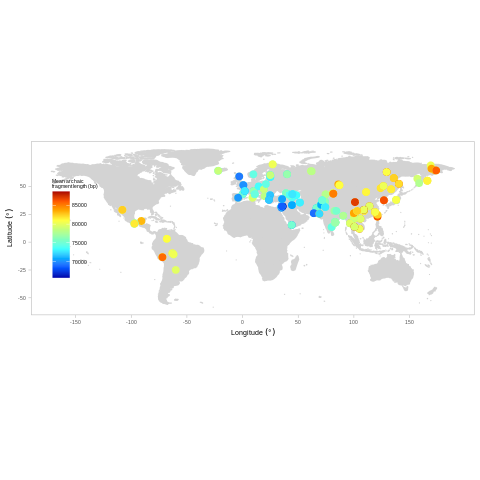

In [389]:
%%R

plot_map_fragment_length <- function(file = "Data1_archaicfragments.txt", stat = "mean", post_prob = 0.5, nean = FALSE){

read.table(file, header = T) %>%
    filter(region %in% c("WestEurasia", "SouthAsia", "America", "CentralAsiaSiberia", "EastAsia")) -> data 
    
    if(post_prob > 0.6){
        data %>%
            filter(MeanProb >= post_prob) -> data
    }
    
    if(nean){
        data %>%
            filter(Vindija > Altai & Vindija > Denisova) -> data
    }
    
    if(stat == "mean"){
        data %>%
            group_by(name, region) %>%
            summarise(frag_len = mean(length)) %>%
            ungroup() -> data
    }else if(stat == "median"){
        data %>%
            group_by(region, name) %>%
            summarise(frag_len = median(length)) %>%
            ungroup()  -> data
    }
    
    data %>%
    mutate(name = as.character(name)) %>%
    left_join(read.table("name_lat_long.txt", header = T, sep = "\t") %>% 
              mutate(name = as.character(name), 
                     lat  = ifelse(name == "S_Norwegian-1", 60.936466, 
                                   ifelse(name == "S_Balochi-2", 30.5,
                                          ifelse(name == "S_Bergamo-1", 46, suppressWarnings(as.numeric(as.character(lat)))))),
                     long = ifelse(name == "S_Norwegian-1",  9.718310, 
                                   ifelse(name == "S_Balochi-2", 66.5, 
                                          ifelse(name == "S_Bergamo-1", 10, suppressWarnings(as.numeric(as.character(long))))))), by = c("name"))  %>% 
    mutate(lat = as.numeric(as.character(lat)), long = as.numeric(as.character(long))) %>% 
    ggplot() + 
    borders("world", colour="lightgrey", fill="lightgrey",  xlim = c(-170, 170), ylim = c(-60, 100)) +
    geom_point(aes(y = lat, x = long, color = frag_len), size = 3) +
    scale_colour_gradientn(colours = colorRamps::matlab.like(10)) +
    labs(color='Mean archaic\nfragment length (bp)') +
    scale_x_continuous(breaks = seq(-150, 150, 50)) +
    scale_y_continuous(breaks = seq(-50, 50, 25)) +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), legend.background= element_blank(), legend.position = c(0.1, 0.5)) +
    coord_fixed(ratio = 1) +
    xlab(expression("Longitude"~(degree))) +
    ylab(expression("Latitude"~(degree))) -> plot
    
    if(stat == "mean"){
        plot
    }else if(stat == "median"){
        plot + labs(color='Median archaic\nfragment length (bp)')
    }
    
}

plot_map_fragment_length() -> Figure1a

Figure1a

##### Figure 1b

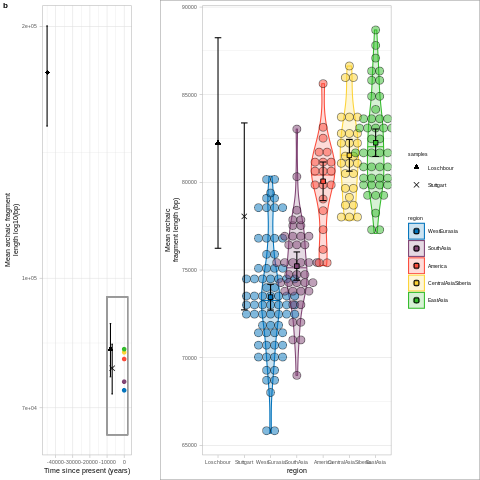

In [126]:
%%R


rbind(
    read.table("SITab1.txt", header = T) %>% select(samples = region, mean_len_mean, mean_len_se) %>% mutate(time = 0),
    read.table("SITab2.txt", header = T) %>% select(samples, mean_len_mean = len_mean, mean_len_se = len_se) %>% mutate(time = c(-45000, -8000, -7000))) -> ancient_extant_mean_frag_len

plot_grid(
    ancient_extant_mean_frag_len%>%
        ggplot() +
        geom_rect(aes(xmin = -10000, xmax = 2000, ymin = 65000, ymax = 95000), color = "grey60", alpha = 0) +
        geom_errorbar(data = . %>% filter(time != 0), aes(x = time, ymax = mean_len_mean+(1.96*mean_len_se), ymin = mean_len_mean-(1.96*mean_len_se))) +
        geom_point(data = . %>% filter(time != 0),    aes(x = time, y = mean_len_mean, shape = samples), size = 2) +
        geom_point(data = . %>% filter(time == 0),    aes(x = time, y = mean_len_mean, color = samples)) +
        scale_y_continuous(trans = "log10") +
        ylab("Mean archaic fragment\nlength log10(bp)") +
        xlab("Time since present (years)") +
        scale_color_manual(values = reg_colors) +
        scale_shape_manual(values = c("Ust_ishim" = 18, "Loschbour" = 17, "Stuttgart" = 4)) +
        theme(legend.position = "none"),
    
    NULL,
    
    
    archaicfragmentstatisticsperind() %>% 
        ggplot() +
        geom_violin(aes(x = region,  y = mean_len, fill = region, color = region), alpha = 0.2, draw_quantiles = c(0.5)) +
        geom_dotplot(aes(x = region, y = mean_len, fill = region),                 binaxis = "y", stackdir='center', alpha = 0.5,
                        binwidth = round((max(archaicfragmentstatisticsperind()$mean_len)-min(archaicfragmentstatisticsperind()$mean_len))/50, digits = 0)) +
        geom_errorbar(data = ancient_extant_mean_frag_len %>% filter(samples != "Ust_ishim"), aes(x = samples, ymin = mean_len_mean-(1.96*mean_len_se), ymax = mean_len_mean+(1.96*mean_len_se)), width = 0.25) + 
        geom_point(   data = ancient_extant_mean_frag_len %>% filter(time == 0), aes(x = samples, y = mean_len_mean, fill = samples),                                                 color = "black", shape = 22, size = 2) +
        geom_point(   data = ancient_extant_mean_frag_len %>% filter(time == 0), aes(x = samples, y = mean_len_mean, fill = samples),                                                 color = "black", shape = 22, size = 2) +
        geom_point(   data = ancient_extant_mean_frag_len %>% filter(time != 0, time > -45000), aes(x = samples, y = mean_len_mean, shape = samples),                                 color = "black",             size = 2) +
        scale_x_discrete(limits = c("Loschbour", "Stuttgart", "WestEurasia", "SouthAsia", "America", "CentralAsiaSiberia", "EastAsia")) +
        scale_fill_manual(values  = reg_colors) +
        scale_color_manual(values = reg_colors) +
        scale_shape_manual(values = c("Ust_ishim" = 18, "Loschbour" = 17, "Stuttgart" = 4)) +
        theme(panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(),  plot.background = element_rect(colour = "grey60")) +
        ylab("Mean archaic\nfragment length (bp)"),
    
    nrow = 1, rel_widths = c(1.5, 0.25, 3.5), align = c("h"), labels = c("b"), label_size = 8, label_fontfamily = "Helvetica") -> Figure1b

Figure1b

##### Figure 1c and d

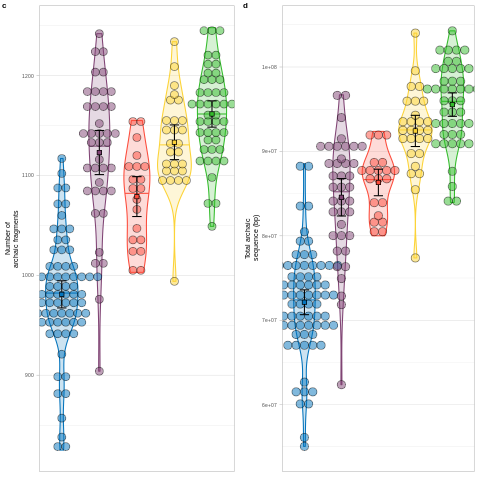

In [77]:
%%R

plot_grid(

    archaicfragmentstatisticsperind() %>% 
        ggplot() +
        geom_violin(aes(x = region,  y = num_frag, fill = region, color = region), alpha = 0.2, draw_quantiles = c(0.5)) +
        geom_dotplot(aes(x = region, y = num_frag, fill = region),                 binaxis = "y", stackdir='center', alpha = 0.5,
                        binwidth = round((max(archaicfragmentstatisticsperind()$num_frag)-min(archaicfragmentstatisticsperind()$num_frag))/50, digits = 0)) +
        geom_errorbar(data = read.table("SITab1.txt", header = T), aes(x = region, ymin = n_frag_mean-(1.96*n_frag_se), ymax = n_frag_mean+(1.96*n_frag_se)), width = 0.25) + 
        geom_point(   data = read.table("SITab1.txt", header = T), aes(x = region, y = n_frag_mean, fill = region),                                                 color = "black", shape = 22, size = 2) +
        scale_fill_manual(values  = reg_colors) +
        scale_color_manual(values = reg_colors) +
        theme(panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(),
              legend.position = "none", , axis.ticks.x = element_blank(), axis.title.x = element_blank(), axis.text.x = element_blank()) +
        ylab("Number of\narchaic fragments"),

    archaicfragmentstatisticsperind() %>% 
        ggplot() +
        geom_violin(aes(x = region,  y = arch_seq, fill = region, color = region), alpha = 0.2, draw_quantiles = c(0.5)) +
        geom_dotplot(aes(x = region, y = arch_seq, fill = region),                 binaxis = "y", stackdir='center', alpha = 0.5,
                        binwidth = round((max(archaicfragmentstatisticsperind()$arch_seq)-min(archaicfragmentstatisticsperind()$arch_seq))/50, digits = 0)) +
        geom_errorbar(data = read.table("SITab1.txt", header = T), aes(x = region, ymin = arch_seq_mean-(1.96*arch_seq_se), ymax = arch_seq_mean+(1.96*arch_seq_se)), width = 0.25) + 
        geom_point(   data = read.table("SITab1.txt", header = T), aes(x = region, y = arch_seq_mean, fill = region),                                                 color = "black", shape = 22, size = 2) +
        scale_fill_manual(values  = reg_colors) +
        scale_color_manual(values = reg_colors) +
        theme(panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(),
              legend.position = "none", , axis.ticks.x = element_blank(), axis.title.x = element_blank(), axis.text.x = element_blank()) +
        ylab("Total archaic\n sequence (bp)"),

nrow = 1, labels = c("c", "d"),label_size = 8, label_fontfamily = "Helvetica") -> Figure1cd

Figure1cd

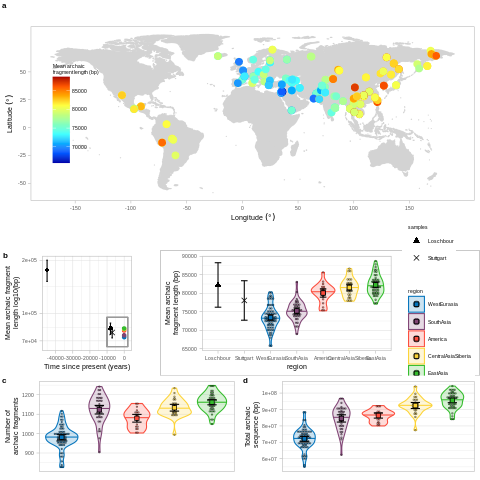

In [180]:
%%R

plot_grid(Figure1a, Figure1b, Figure1cd, ncol = 1, rel_heights = c(3, 1.5, 1.25), labels = c("a"), label_size = 8, label_fontfamily = "Helvetica") -> Figure1

Figure1

ggsave("Figure1.pdf", width = 18, height = 18, units = "cm")

Figure1

<a name="MaiFig2"></a>
#### Figure 2
##### Figure 2a

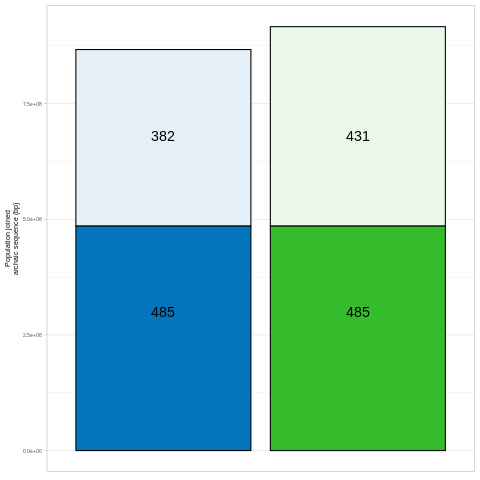

In [208]:
%%R

read.table("SITab3.txt", header = T) %>% filter(type == "Shared", region == "WestEurasia") %>% pull(arch_seq) -> shared_seq
read.table("SITab3.txt", header = T) %>% filter(type == "Private", region == "WestEurasia") %>% pull(arch_seq) -> private_seq_WE
read.table("SITab3.txt", header = T) %>% filter(type == "Private", region == "EastAsia") %>% pull(arch_seq) -> private_seq_EA

data.frame(archseq = c(private_seq_EA, private_seq_WE, shared_seq,    shared_seq),
           region  = c(    "EastAsia",  "WestEurasia", "EastAsia", "WestEurasia"),
           type    = c(     "private",      "private",   "shared",      "shared")) %>%
    mutate(region = factor(region, levels = c("WestEurasia", "EastAsia"))) %>%
    ggplot() +
    geom_bar(stat = "identity", aes(x = region, y = archseq), fill = "white") +
    geom_bar(stat = "identity", aes(x = region, y = archseq, fill = region, alpha = type), color = "black") +
    geom_text(data = . %>% filter(type == "private"), aes(x = region, y = 6.8e8, label = round(archseq/1000000, digits = 0)), size = 5, family = "Helvetica") +
    geom_text(data = . %>% filter(type != "private"), aes(x = region, y = 3e8, label = round(archseq/1000000, digits = 0)),   size = 5, family = "Helvetica") +
    scale_fill_manual(values = reg_colors) +
    ylab("Population joined\narchaic sequence (bp)") +
    theme(axis.text.x  = element_blank(), axis.title.x = element_blank(), 
          axis.ticks.x = element_blank(), panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), legend.position = "none") -> Figure2a

Figure2a

##### Figure 2b

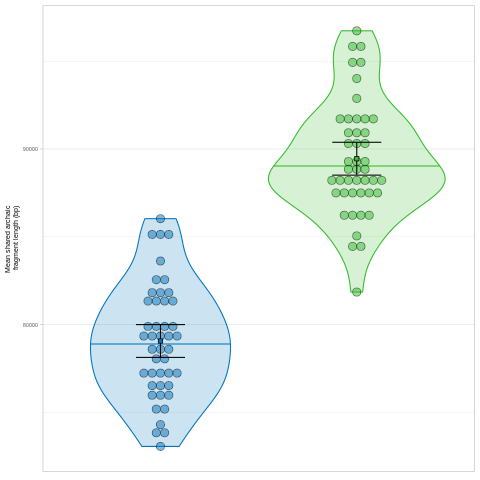

In [209]:
%%R

read.table("archaicfragments_ind_shared_WEEA.txt", header = T) %>% 
    group_by(name, region) %>%
    summarize(mean_len = mean(length)) %>%
    mutate(region = factor(region, levels = c("WestEurasia", "EastAsia")))-> archfrag_ind_shared_WEEA

archfrag_ind_shared_WEEA %>%
    ggplot() +
    geom_violin(aes(x = region,  y = mean_len, fill = region, color = region), alpha = 0.2, draw_quantiles = c(0.5)) +
    geom_dotplot(aes(x = region, y = mean_len, fill = region),                 binaxis = "y", stackdir='center', alpha = 0.5,
                    binwidth = round((max(archfrag_ind_shared_WEEA$mean_len)-min(archfrag_ind_shared_WEEA$mean_len))/50, digits = 0)) +
    geom_errorbar(data = read.table("SITab4.txt", header = T) %>% filter(type == "Shared"), aes(x = region, ymin = mean_len_mean-(1.96*mean_len_se), ymax = mean_len_mean+(1.96*mean_len_se)), width = 0.25) +
    geom_point(   data = read.table("SITab4.txt", header = T) %>% filter(type == "Shared"), aes(x = region, y = mean_len_mean, fill = region),                                                 color = "black", shape = 22, size = 2) +
    scale_fill_manual(values  = reg_colors) +
    scale_color_manual(values = reg_colors) +
    theme(panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(),
          legend.position = "none", , axis.ticks.x = element_blank(), axis.title.x = element_blank(), axis.text.x = element_blank()) +
    ylab("Mean shared archaic\n fragment length (bp)") -> Figure2b

Figure2b

##### Figure 2c

In [350]:
%%bash

bedtools intersect -c -a <(awk '{for(i = $2; i < $3; i = i+1000){print $1"\t"i"\t"i+1000}}' archaicfragments_joined_WE.bed) \
                      -b <(awk '{print $3"\t"$4"\t"$5}' archaicfragments_WE.txt | bedtools sort) > archaicfragments_freq_WE_all_fragments.txt

awk '{print $4}' archaicfragments_freq_WE_all_fragments.txt | sort -k1,1n | uniq -c | awk 'BEGIN{print "freq\tcounts\treg"}{print $2"\t"$1"\tWestEurasia"}' > archaicfragments_freq_WEEA.txt

bedtools intersect -c -a <(awk '{for(i = $2; i < $3; i = i+1000){print $1"\t"i"\t"i+1000}}' archaicfragments_joined_EA.bed) \
                      -b <(awk '{print $3"\t"$4"\t"$5}' archaicfragments_EA.txt | bedtools sort) > archaicfragments_freq_EA_all_fragments.txt

awk '{print $4}' archaicfragments_freq_EA_all_fragments.txt | sort -k1,1n | uniq -c | awk '{print $2"\t"$1"\tEastAsia"}' >> archaicfragments_freq_WEEA.txt

awk 'BEGIN{print "chrom\tstart\tend\tfreq\tregion"}' > archaicfragments_freq_WEEA_all_fragments.txt
awk '{print $0"\tWestEurasia"}' archaicfragments_freq_WE_all_fragments.txt >> archaicfragments_freq_WEEA_all_fragments.txt
awk '{print $0"\tEastAsia"}'    archaicfragments_freq_EA_all_fragments.txt >> archaicfragments_freq_WEEA_all_fragments.txt

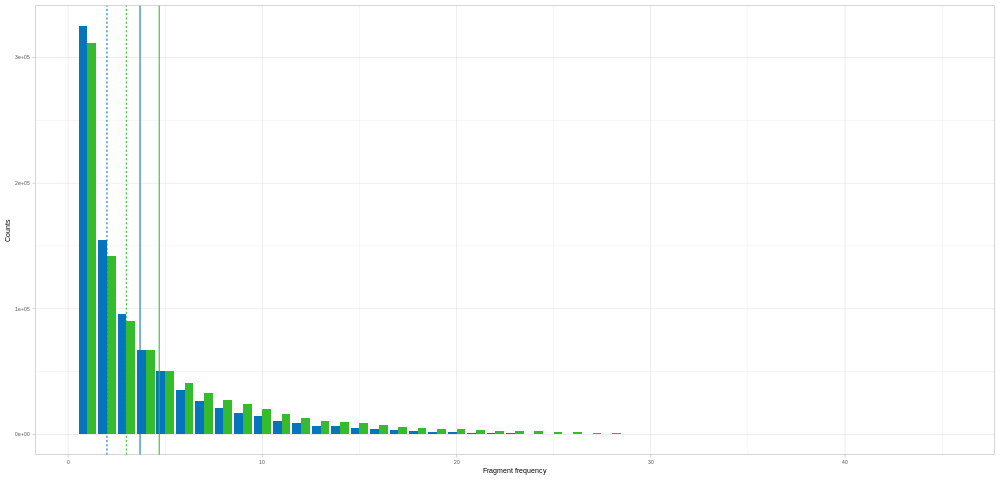

In [325]:
%%R -w 1000

read.table("archaicfragments_freq_WEEA.txt", header = T) %>% group_by(reg) %>% mutate(median = cumsum(counts)/sum(counts)) %>% filter(median > 0.5) %>% summarize(median = min(freq)) -> median_freq
read.table("archaicfragments_freq_WEEA.txt", header = T) %>% group_by(reg) %>% summarize(mean = sum(freq*counts)/sum(counts)) -> mean_freq
full_join(median_freq, mean_freq, by = c("reg")) %>% gather("stat", "value", median, mean) -> mean_median_freq

read.table("archaicfragments_freq_WEEA.txt", header = T) %>% 
    mutate(reg = factor(reg, levels = c("WestEurasia", "EastAsia"))) %>%
    ggplot() +
    geom_bar(stat = "identity", aes(x = freq, y = counts, fill = reg), position = position_dodge(), show.legend = F) +
    geom_vline(data = mean_median_freq, aes(xintercept = value, color = reg, linetype = stat), show.legend = F) +
    scale_fill_manual(values = reg_colors) +
    scale_color_manual(values = reg_colors) +
    ylab("Counts") +
    xlab("Fragment frequency") -> main
    
main
    

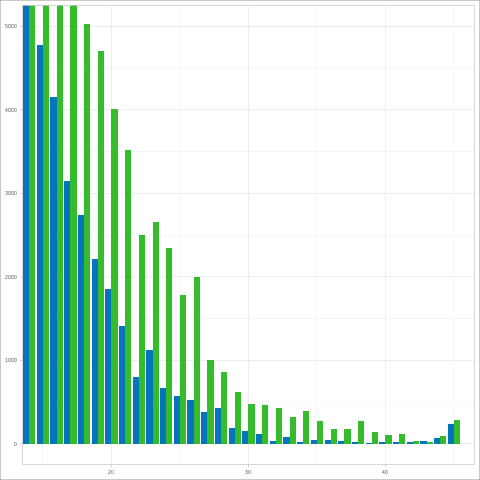

In [200]:
%%R

main +  coord_cartesian(xlim = c(15, 45), ylim = c(0, 5000)) +
    theme(axis.title = element_blank(), plot.background = element_rect(colour = "grey60")) -> insert
    
insert

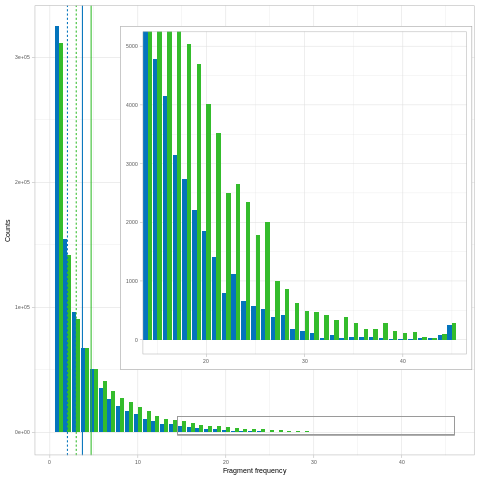

In [213]:
%%R

ggdraw(main + geom_rect(aes(xmin = 14.5, xmax = 46, ymin = -2000, ymax = 12500), color = "grey60", alpha = 0, size = 0.25) + draw_plot(insert, 8, 5e4, 40, 2.75e5)) -> Figure2c

Figure2c

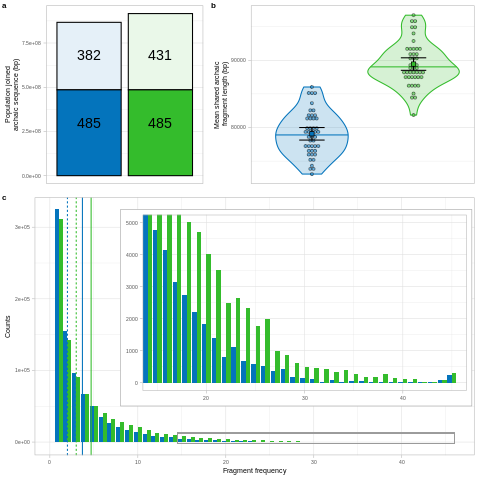

In [214]:
%%R

plot_grid(plot_grid(Figure2a, Figure2b, nrow = 1, rel_widths= c(1, 1.3), labels = c("a", "b"), label_size = 8, label_fontfamily = "Helvetica"),
          Figure2c,
          rel_heights = c(1, 1.5), ncol = 1, labels = c("", "c"), label_size = 8, label_fontfamily = "Helvetica") -> Figure2

Figure2

ggsave("Figure2.pdf", width = 8, height = 7, units = "cm")

Figure2

<a name="MaiFig3"></a>
#### Figure 3
##### Figure 3a

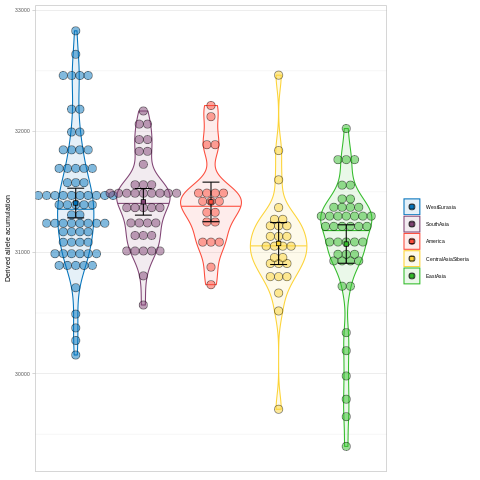

In [51]:
%%R

read.table("Data2_mutation_spectrum.txt", header = T) %>% filter(chrom != "X", chrom != "Y") %>% group_by(ind, reg) %>% summarise(counts = sum(counts)) %>% ungroup() %>% pull(counts) %>% max() -> max_plot
read.table("Data2_mutation_spectrum.txt", header = T) %>% filter(chrom != "X", chrom != "Y") %>% group_by(ind, reg) %>% summarise(counts = sum(counts)) %>% ungroup() %>% pull(counts) %>% min() -> min_plot

read.table("Data2_mutation_spectrum.txt", header = T) %>%
    filter(chrom != "X", chrom != "Y") %>%
    group_by(ind, reg) %>%
    summarise(counts = sum(counts)) %>%
    ungroup() %>%
    mutate(reg = factor(reg, levels = c("WestEurasia", "SouthAsia", "America", "CentralAsiaSiberia", "EastAsia"))) %>% 
    ggplot() +
    geom_violin(aes(x = reg, y = counts, color = reg, fill = reg), alpha = 0.1, draw_quantiles = c(0.5)) +
    geom_dotplot(aes(y = counts, x = reg, fill = reg), binaxis = "y", stackdir='center', dotsize = 1, binwidth = (max_plot-min_plot)/50, alpha = 0.5) +
    ylab("Derived allele acumulation") +
    theme(legend.title = element_blank(), axis.text.x = element_blank(), axis.ticks.x = element_blank(), axis.title.x = element_blank(),
          panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank()) +
    scale_color_manual(values = reg_colors)+
    scale_fill_manual(values = reg_colors) + 
    geom_errorbar(data = read.table("SITab6.txt", header =  T), aes(x = reg, ymin = derallele_mean-(1.96*derallele_se), ymax = derallele_mean+(1.96*derallele_se)), width = 0.25, size = 0.5) +
    geom_point(data = read.table("SITab6.txt", header =  T), aes(x = reg, y = derallele_mean, fill = reg), color = "black", size = 2, shape = 22) -> Figure3a

Figure3a

##### Figure 3b

Reads the DNM file from the deCODE paper and annotates the 5' and 3' base pairs of each mutation. It also takes the strand complementary mutation so that all mutations ancestral allele are represented by C or T.

In [172]:
c = {"A" : "T",
     "T" : "A", 
     "C" : "G",
     "G" : "C"}

def get_href(chrom_num):
    href = ""
    with open("/home/moicoll/GenerationTime/faststorage/02MutationProfile/data/GRCh38_hg38/chr{}.fa".format(chrom_num)) as fasta:
        for i, line in enumerate(fasta):
            if i:
                href += line.strip()
    return href
    

prev_chrom = None
out        = open("aau1043_DataS5_revision1_context.tsv", "w")
with open("/home/moicoll/GenerationTime/faststorage/02MutationProfile/data/DNM_deCODE_new_data/aau1043_DataS5_revision1.tsv") as file:
    for i, line in enumerate(file):
            
        if line.strip()[0] != "#" and line.strip()[0:3] != "Chr":
            chrom = line.strip().split("\t")[0]
            pos   = int(line.strip().split("\t")[1])-1
            ref   = line.strip().split("\t")[2]
            alt   = line.strip().split("\t")[3]
            if chrom != prev_chrom:
                href = get_href(chrom[3:])
                prev_chrom = chrom
            if len(ref) > 1 or len(alt) > 1:
                out.write("\t".join([    chrom, str(pos),   fiv,    ref,    thr,    alt,  "T"] + line.strip().split("\t")[4:-1] + [line.strip().split("\t")[-1].replace(" ", "_")])+"\n")
            else:
                fiv   = href[pos-1].upper()
                thr   = href[pos+1].upper()
                if ref in ["C", "T"]:
                    out.write("\t".join([chrom, str(pos),   fiv,    ref,    thr,    alt,  "F"] + line.strip().split("\t")[4:-1] + [line.strip().split("\t")[-1].replace(" ", "_")])+"\n")
                else:
                    out.write("\t".join([chrom, str(pos), c[thr], c[ref], c[fiv], c[alt], "F"] + line.strip().split("\t")[4:-1] + [line.strip().split("\t")[-1].replace(" ", "_")])+"\n")
        else:
            if line.strip()[0:3] == "Chr":
                out.write("\t".join(["chrom", "pos", "fiv", "ref", "thr", "alt", "indel", "Proband_id", "Phase_combined", "Crossover", "Sanger"])+"\n")
out.close()

In [48]:
%%R

plot_SGDP_corr <- function(m){
    
    #Returns the correlation between mutation spectrum fraction and the mean archaic fragment length plot for the SGDP data
    
    read.table("SITab7.txt", header = T) %>% 
    gather("mut_stat", "value", 2:37) %>%
    separate(mut_stat, c("mutation", "countfrac", "stat"), sep = "_") %>%
    filter(countfrac == "frac") %>%
    select(-c(countfrac)) %>%
    mutate(mutation = str_replace(mutation, "\\.", ">"),
            stat = ifelse(stat == "mean", "frac_mean", "frac_se")) %>%
    spread(stat, value) %>%
    full_join(read.table("SITab1.txt", header = T) %>% select(reg = region, mean_len_mean, mean_len_se), by = c("reg")) %>%
    filter(mutation == m) -> mutation_spectrum_mean_len_perreg
    
    mutation_spectrum_mean_len_perind() %>%
        mutate(mean_len = mean_len/1000) %>%
        filter(mutation == m) %>%
        ggplot() +
        geom_point(aes(y = frac, x = mean_len, color = reg), alpha = 0.5) +
        geom_smooth(method = "lm", formula = 'y ~ x', aes(y = frac, x = mean_len), color = "black", se = TRUE) +
        geom_errorbarh(data = mutation_spectrum_mean_len_perreg %>% mutate(mean_len_mean = mean_len_mean/1000, mean_len_se = mean_len_se/1000), aes(xmin = mean_len_mean-(1.96*mean_len_se), xmax = mean_len_mean+(1.96*mean_len_se), y = frac_mean)) +
        geom_errorbar( data = mutation_spectrum_mean_len_perreg %>% mutate(mean_len_mean = mean_len_mean/1000), aes(x    = mean_len_mean,                                                             ymin = frac_mean-(1.96*frac_se), ymax = frac_mean+(1.96*frac_se))) +
        geom_point(    data = mutation_spectrum_mean_len_perreg %>% mutate(mean_len_mean = mean_len_mean/1000), aes(x    = mean_len_mean,                                                             y = frac_mean, fill = reg), shape = 22, color = "black", size = 3) +
        theme(aspect.ratio = 1, legend.position = "none", 
              axis.title = element_blank()) +
        facet_wrap(~mutation, nrow = 1)  +
        scale_color_manual(values = reg_colors) +
        scale_fill_manual(values = reg_colors)
}


plot_deCODE_corr <- function(m){
    
    #Returns the correlation between mutation spectrum fraction (de novo mutations) and the mean parental age plot for the deCODE data
    
    deCODE_mutation_spectrum_mean_age() %>%                     
        filter(mutation == m) %>%
        ggplot() +
        geom_smooth(method = "lm",  formula = y ~ x, aes(x = age, y = frac, weight=n_probands), se = T) +
        xlab("") +
        ylab("") +
        theme(aspect.ratio     = 1, plot.background = element_blank(),
              legend.position  = "none", 
              axis.title       = element_blank()) 
}



max_min_SGDP <- function(mut){
    
    #Defines the maximum and minimum of the y axis of the SGDP plot
    
    mutation_spectrum_mean_len_perind() %>% 
        group_by(mutation) %>% 
        summarize(max = max(frac), min = min(frac), diff = (max-min)/2, middle = min+diff) %>% 
        mutate(max = middle+max(diff), min = middle-max(diff)) %>%
        filter(mutation == mut) %>%
        select(max, min)
}

max_min_deCODE <- function(mut){
    
    #Defines the maximum and minimum of the y axis of the deCODE plot
    
    mutation_spectrum_mean_len_perind() %>% 
        group_by(mutation) %>% 
        summarize(diff = (max(frac)-min(frac))/2) %>%
        pull(diff) %>%
        max() -> max_diff_SGDP
    
    read.table("SITab8.txt", header = T) %>%
        filter(data_set == "deCODE") %>%
        select(coefficient, mutation, estimate) %>%
        spread(coefficient, estimate) %>%
        mutate(middle = (slope*30)+intercept,
               max    = middle+max_diff_SGDP,
               min    = middle-max_diff_SGDP) %>%
        filter(mutation == mut) %>%
        select(max, min)
}

plot_mutspect_two_datasets <- function(m, x = .52, y = .15, len = .45, high = .45){
    
    #Puts together the SGDP and the deCODE plot
    
    plot_deCODE_corr(m) + 
        coord_cartesian(ylim = c(max_min_deCODE(m)$min, max_min_deCODE(m)$max)) -> insert

    plot_SGDP_corr(m) + 
        coord_cartesian(ylim = c(max_min_SGDP(m)$min,   max_min_SGDP(m)$max)) -> main

    ggdraw(main) + draw_plot(insert, x, y, len, high)
}


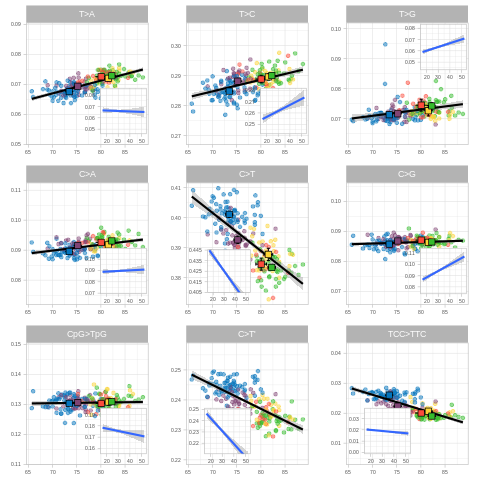

In [49]:
%%R

plot_grid(
plot_mutspect_two_datasets("T>A",     .50, .05, .45, .45),
plot_mutspect_two_datasets("T>C",     .50, .05, .45, .45),
plot_mutspect_two_datasets("T>G",     .50, .45, .45, .45),
plot_mutspect_two_datasets("C>A",     .50, .05, .45, .45),
plot_mutspect_two_datasets("C>T",     .15, .05, .45, .45),
plot_mutspect_two_datasets("C>G",     .50, .05, .45, .45),
plot_mutspect_two_datasets("CpG>TpG", .50, .05, .45, .45),
plot_mutspect_two_datasets("C>T'",    .15, .05, .45, .45),
plot_mutspect_two_datasets("TCC>TTC", .15, .05, .45, .45), nrow = 3) -> Figure3b

Figure3b

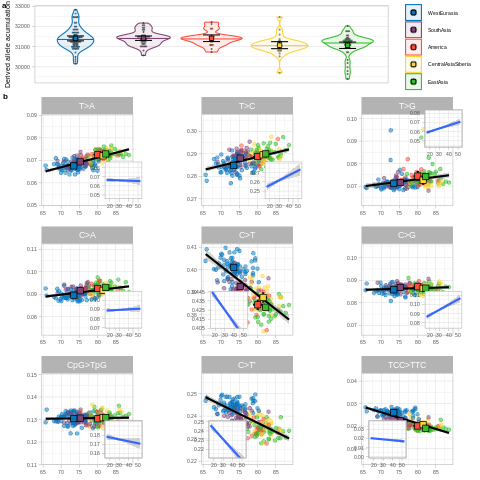

In [54]:
%%R

Figure3 <- plot_grid(Figure3a, Figure3b, ncol = 1, rel_heights = c(4, 17), labels = c("a", "b"), label_size = 8, label_fontfamily = "Helvetica")

Figure3

ggsave("Figure3.pdf", width = 17, height = 21, units = "cm")

Figure3

<a name="MaiFig4"></a>
#### Figure 4
##### Figure 4a

In [4]:
def get_call(chrom):
    total = 0
    calla = 0

    with open("reproducible/chr{}_masked.fa".format(chrom), "r") as file:
        for line in file:
            if line[0] != ">":
                for c in line.strip():
                    if c in ["A", "C", "T", "G"]:
                        calla += 1
                    total += 1
    return [total, calla]

if not os.path.isfile('callability_per_chromosome.txt'):
    callable_bases = []
    chromosomes    = [str(c) for c in range(1, 23)]+["X"]
    for chrom in chromosomes:
        callable_bases.append(get_call(chrom))

    callable_bases = np.array(callable_bases)

    call_per_chrom = pd.DataFrame({
        "chrom"  : chromosomes,
        "length" : callable_bases[:, 0],
        "callab" : callable_bases[:, 1],
    })

    call_per_chrom.to_csv("callability_per_chromosome.txt", sep='\t', index=False)
else:
    call_per_chrom = pd.read_csv("callability_per_chromosome.txt", sep='\t')
    
call_per_chrom

,chrom,length,callab
0,1,249250621,43986308
1,2,243199373,51348560
2,3,198022430,37889565
3,4,191154276,35316823
4,5,180915260,34083932
5,6,171115067,26973302
6,7,159138663,34768386
7,8,146364022,37499556
8,9,141213431,24635048
9,10,135534747,25103125


In [227]:
%%R

X_to_A_ratio_perind <- function(){
    read.table("callability_per_chromosome.txt", header = T) %>%
        mutate(chrom = ifelse(chrom == "X", "X", "A")) %>%
        group_by(chrom) %>%
        summarize(callab = sum(callab)) -> call_X_A

    read.table("Data2_mutation_spectrum.txt", header = T) %>%
        filter(chrom != "Y", sex == "F") %>% 
        mutate(chrom = ifelse(chrom == "X", "X", "A")) %>%
        group_by(ind, reg, chrom) %>%
        summarize(counts = sum(counts)) %>% 
        mutate(call = ifelse(chrom == "A", call_X_A %>% filter(chrom == "A") %>% pull(callab), call_X_A %>% filter(chrom == "X") %>% pull(callab))) %>%
        mutate(prop = counts/call) %>%
        select(-c(counts, call)) %>%
        spread(chrom, prop) %>%
        mutate(ratio = X/A) %>% 
        left_join(archaicfragmentstatisticsperind() %>% select(ind = name, mean_len), by = c("ind"))
}

In [34]:
X_to_A_ratio_perind = %R X_to_A_ratio_perind()

X_to_A_ratio_perind

,ind,reg,A,X,ratio,mean_len
1,S_Adygei-2,WestEurasia,0.000060,0.000046,0.774969,75672.380952
2,S_Albanian-1,WestEurasia,0.000057,0.000051,0.899544,78357.217030
3,S_Aleut-2,CentralAsiaSiberia,0.000057,0.000047,0.829191,79658.304498
4,S_Basque-2,WestEurasia,0.000058,0.000044,0.770934,75028.397566
5,S_BedouinB-2,WestEurasia,0.000057,0.000047,0.833592,69807.692308
...,...,...,...,...,...,...
76,S_Ulchi-2,CentralAsiaSiberia,0.000056,0.000049,0.867239,82059.181897
77,S_Uygur-1,EastAsia,0.000055,0.000047,0.867482,78245.107176
78,S_Yakut-1,CentralAsiaSiberia,0.000055,0.000045,0.818291,86639.240506
79,S_Yemenite_Jew-1,WestEurasia,0.000058,0.000045,0.778728,69215.827338


In [39]:
X_to_A_ratio_perreg = defaultdict(lambda : None)

for stat in ["ratio", "mean_len"]:
    X_to_A_ratio_perreg[stat] = boot_perregion(X_to_A_ratio_perind, regions, stat)
    
X_to_A_ratio_perreg_df = pd.DataFrame({
    "reg"           : regions,
    "ratio_mean"    : X_to_A_ratio_perreg["ratio"][:, 0],
    "ratio_se"      : X_to_A_ratio_perreg["ratio"][:, 1],
    "mean_len_mean" : X_to_A_ratio_perreg["mean_len"][:, 0],
    "mean_len_se"   : X_to_A_ratio_perreg["mean_len"][:, 1],
})

X_to_A_ratio_perreg_df

,reg,ratio_mean,ratio_se,mean_len_mean,mean_len_se
0,WestEurasia,0.820266,0.007241,73911.865042,651.231118
1,SouthAsia,0.846917,0.007682,73268.120494,942.331088
2,America,0.825819,0.005881,80298.373739,700.893123
3,CentralAsiaSiberia,0.833723,0.005097,81931.591682,639.871784
4,EastAsia,0.856051,0.004925,81589.618006,613.829734


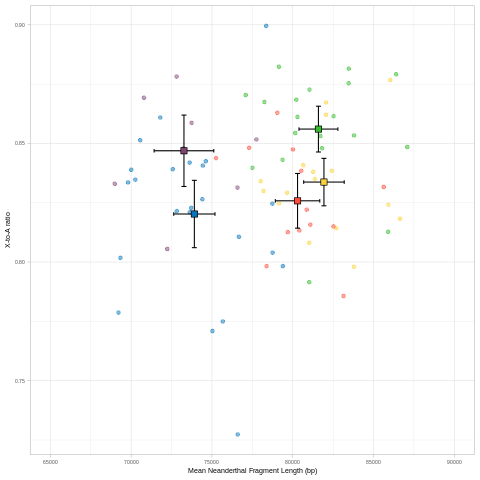

In [40]:
%%R -i X_to_A_ratio_perreg_df

X_to_A_ratio_perind() %>% 
    ggplot() +
    geom_point(aes(x = mean_len, y = ratio, color = reg), alpha = 0.5) +
    geom_errorbar( data = X_to_A_ratio_perreg_df, aes(ymin = ratio_mean-(1.96*ratio_se),       ymax = ratio_mean+(1.96*ratio_se),       x = mean_len_mean)) +
    geom_errorbarh(data = X_to_A_ratio_perreg_df, aes(xmin = mean_len_mean-(1.96*mean_len_se), xmax = mean_len_mean+(1.96*mean_len_se), y = ratio_mean), height = .0015) +
    geom_point(    data = X_to_A_ratio_perreg_df, aes(x = mean_len_mean, y = ratio_mean, fill = reg), size = 3, shape = 22) +
    scale_color_manual(values = reg_colors) +
    scale_fill_manual(values = reg_colors) +
    xlab("Mean Neanderthal Fragment Length (bp)") +
    ylab("X-to-A ratio") +
    theme(legend.position = "none") +
    xlim(c(65000, 90000)) -> Fig4a

Fig4a

##### Figure 4b

In [230]:
%%R

CGenrichment_perind <- function(){
    read.table("CGenrichment.txt", header = T) %>% 
        group_by(ind, reg) %>% 
        summarize(nonEnrCG = sum(nonEnrCG), nonEnrnonCG = sum(nonEnrnonCG), EnrCG = sum(EnrCG), EnrnonCG = sum(EnrnonCG)) %>%
        mutate(ratio = (EnrCG/(EnrCG+EnrnonCG))/(nonEnrCG/(nonEnrCG+nonEnrnonCG))) 
}

In [42]:
CGenrichment_perind = %R CGenrichment_perind()
CGenrichment_perind

,ind,reg,nonEnrCG,nonEnrnonCG,EnrCG,EnrnonCG,ratio
1,S_Abkhasian-1,WestEurasia,2015,22578,346,2761,1.359162
2,S_Abkhasian-2,WestEurasia,2073,22814,364,2879,1.347497
3,S_Adygei-1,WestEurasia,2135,23603,374,2947,1.357624
4,S_Adygei-2,WestEurasia,2228,23941,363,2880,1.314715
5,S_Albanian-1,WestEurasia,2056,22795,350,2868,1.314628
...,...,...,...,...,...,...,...
198,S_Yemenite_Jew-2,WestEurasia,2100,23077,354,2825,1.335050
199,S_Yi-1,EastAsia,1909,21549,398,2816,1.521676
200,S_Yi-2,EastAsia,2018,22401,355,2694,1.408892
201,S_Zapotec-1,America,2108,23233,375,2814,1.413611


In [44]:
CGenrichment_perreg = boot_perregion(CGenrichment_perind, regions, "ratio")
    
CGenrichment_perreg_df = pd.DataFrame({
    "reg"        : regions,
    "ratio_mean" : CGenrichment_perreg[:, 0],
    "ratio_se"   : CGenrichment_perreg[:, 1]})

CGenrichment_perreg_df

,reg,ratio_mean,ratio_se
0,WestEurasia,1.366715,0.008523
1,SouthAsia,1.385213,0.008980
2,America,1.433243,0.014961
3,CentralAsiaSiberia,1.387306,0.011183
4,EastAsia,1.396635,0.010532


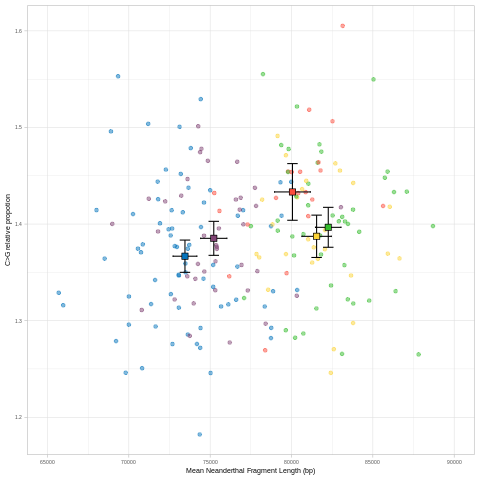

In [45]:
%%R -i CGenrichment_perreg_df

CGenrichment_perind() %>% 
    select(reg, ind, ratio) %>%
    full_join(archaicfragmentstatisticsperind() %>% select(ind = name, mean_len), by = c("ind")) %>%
    ggplot() +
    geom_point(aes(x = mean_len, y = ratio, color = reg), alpha = 0.5) +
    geom_errorbar( data = CGenrichment_perreg_df %>% full_join(read.table("SITab1.txt", header = T) %>% select(reg = region, mean_len_mean, mean_len_se), by = c("reg")), 
                  aes(ymin = ratio_mean-(1.96*ratio_se),       ymax = ratio_mean+(1.96*ratio_se),       x = mean_len_mean)) +
    geom_errorbarh(data = CGenrichment_perreg_df %>% full_join(read.table("SITab1.txt", header = T) %>% select(reg = region, mean_len_mean, mean_len_se), by = c("reg")), 
                   aes(xmin = mean_len_mean-(1.96*mean_len_se), xmax = mean_len_mean+(1.96*mean_len_se), y = ratio_mean), height = .0015) +
    geom_point(    data = CGenrichment_perreg_df %>% full_join(read.table("SITab1.txt", header = T) %>% select(reg = region, mean_len_mean, mean_len_se), by = c("reg")) ,
                   aes(x = mean_len_mean, y = ratio_mean, fill = reg), size = 3, shape = 22) +
    scale_color_manual(values = reg_colors) +
    scale_fill_manual(values = reg_colors) +
    xlab("Mean Neanderthal Fragment Length (bp)") +
    ylab("C>G relative propotion") +
    theme(legend.position = "none") +
    xlim(c(65000, 90000)) -> Fig4b

Fig4b

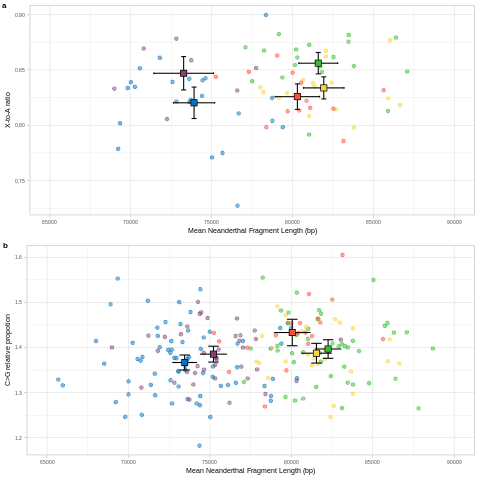

In [46]:
%%R

plot_grid(Fig4a, Fig4b, labels = c("a", "b"), ncol = 1, label_size = 8, label_fontfamily = "Helvetica") -> Fig4
Fig4
ggsave("Figure4.pdf", width = 8, height = 10, units = "cm")
Fig4

[<img src="arrow.png" width="100" style="float: left;">](#HomeHome) &nbsp;

&nbsp;

<a name="ExtFig"></a>
### B. Extended Figures

<a name="ExtFig1"></a>
#### Extended Figure 1

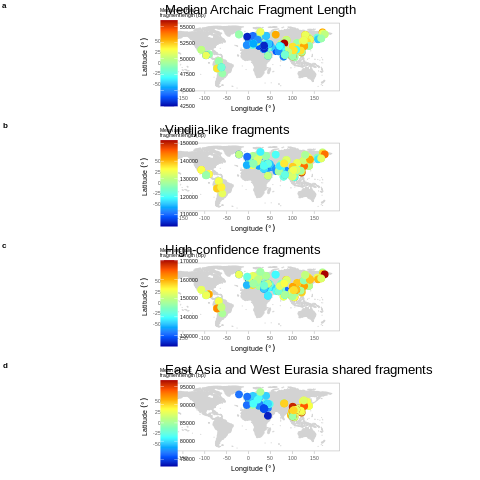

In [390]:
%%R

plot_grid(
    plot_map_fragment_length("Data1_archaicfragments.txt",           stat = "median", post_prob = 0.50, nean = FALSE) + ggtitle("Median Archaic Fragment Length"             ),
    plot_map_fragment_length("Data1_archaicfragments.txt",           stat = "mean",   post_prob = 0.50, nean = TRUE ) + ggtitle("Vindija-like fragments"                     ),
    plot_map_fragment_length("Data1_archaicfragments.txt",           stat = "mean",   post_prob = 0.90, nean = FALSE) + ggtitle("High-confidence fragments"                  ), 
    plot_map_fragment_length("archaicfragments_ind_shared_WEEA.txt", stat = "mean",   post_prob = 0.50, nean = FALSE) + ggtitle("East Asia and West Eurasia shared fragments"), 
ncol = 1, labels = c("a", "b", "c", "d"), label_size = 8, label_fontfamily = "Helvetica") -> ExtFig1

ExtFig1

ggsave("ExtendedFigure1.pdf",  width = 14, height = 24, units = "cm")

ExtFig1

<a name="ExtFig2"></a>
#### Extended Figure 2

##### Extended Figure 2a

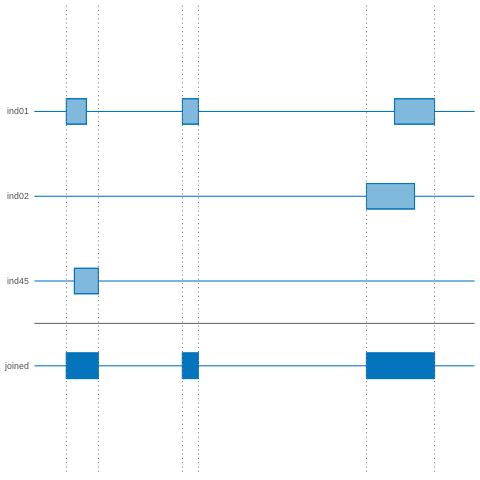

In [182]:
%%R

rbind(data.frame(y = c(4),label = c("ind01"),region = c("WestEurasia"), xmin = c(3),xmax = c(8), stringsAsFactors = F),
                 c(4, "ind01",  "WestEurasia", 32, 36),
                 c(4, "ind01",  "WestEurasia", 85, 95),
      
                 c(3, "ind02",  "WestEurasia", 78, 90),
                 c(2, "ind45",  "WestEurasia",  5, 11),
                 #c(2, "ind45",  "WestEurasia", 60, 65),
                 c(1, "merged", "WestEurasia",  3, 11),
                 c(1, "merged", "WestEurasia", 32, 36),
                 #c(1, "merged", "WestEurasia", 60, 65),
                 c(1, "merged", "WestEurasia", 78, 95)) %>%
    mutate(y = as.numeric(y), xmin = as.numeric(xmin), xmax = as.numeric(xmax)) %>%
    ggplot() +
    geom_hline(aes(yintercept = y, color = region), show.legend = F) +
    geom_rect(aes(xmin = xmin, xmax = xmax, ymin = y-0.15, ymax = y+0.15, color = region), fill = "white", show.legend = F) +
    geom_rect(aes(xmin = xmin, xmax = xmax, ymin = y-0.15, ymax = y+0.15, color = region, fill = region), alpha = 0.5, show.legend = F) +
    geom_rect(data = . %>% filter(label == "merged"), aes(xmin = xmin, xmax = xmax, ymin = y-0.15, ymax = y+0.15, color = region, fill = region), show.legend = F) +
    geom_vline(data = . %>% filter(label == "merged"), aes(xintercept = xmax), linetype = "dotted", color = "gray50") +
    geom_vline(data = . %>% filter(label == "merged"), aes(xintercept = xmin), linetype = "dotted", color = "gray50") +
    geom_hline(yintercept = 1.5, color = "gray40") +
    xlim(c(0, 100)) +
    scale_fill_manual(values = reg_colors) +
    scale_color_manual(values = reg_colors) +
    scale_y_continuous(labels = c("", "joined", "ind45", "ind02", "ind01", ""), limits = c(0, 5)) +
    theme_classic() +
    theme(axis.line = element_blank(), axis.ticks = element_blank(), axis.text.x = element_blank()) -> ExtFig2a

ExtFig2a

##### Extended Figure 2b

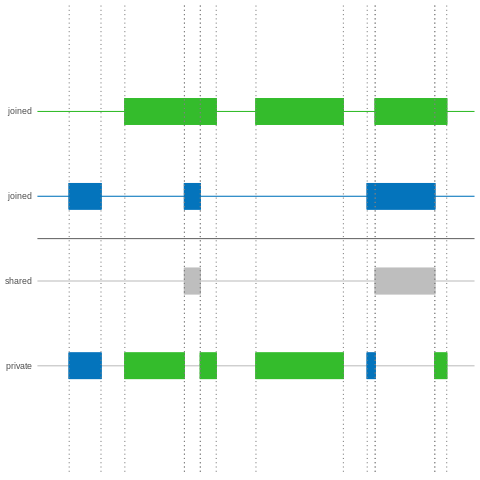

In [195]:
%%R

rbind(data.frame(y = c(4),label = c("merged"),region = c("EastAsia"), xmin = c(17),xmax = c(40), stringsAsFactors = F),
                 c(4, "merged",  "EastAsia", 50, 72),
                 c(4, "merged",  "EastAsia", 80, 98),
      
                 c(3, "merged", "WestEurasia",  3, 11),
                 c(3, "merged", "WestEurasia", 32, 36),
                 c(3, "merged", "WestEurasia", 78, 95),

                 c(2, "merged",  "both", 32, 36),
                 c(2, "merged",  "both", 80, 95),
                  
                 c(1, "merged",  "WestEurasia",  3, 11),
                 c(1, "merged",  "EastAsia",    17, 32),
                 c(1, "merged",  "EastAsia",    36, 40),
                 c(1, "merged",  "EastAsia",    50, 72),
                 c(1, "merged",  "WestEurasia", 78, 80),
                 c(1, "merged",  "EastAsia",    95, 98)) %>%
    mutate(y = as.numeric(y), xmin = as.numeric(xmin), xmax = as.numeric(xmax)) %>%
    ggplot() +
    geom_hline(data = . %>% filter(y != 1), aes(yintercept = y, color = region), show.legend = F) +
    geom_hline(data = . %>% filter(y == 1), aes(yintercept = y), color = "grey", show.legend = F) +
    geom_rect(aes(xmin = xmin, xmax = xmax, ymin = y-0.15, ymax = y+0.15, color = region), fill = "white", show.legend = F) +
    geom_rect(aes(xmin = xmin, xmax = xmax, ymin = y-0.15, ymax = y+0.15, color = region, fill = region), alpha = 0.5, show.legend = F) +
    geom_rect(data = . %>% filter(label == "merged"), aes(xmin = xmin, xmax = xmax, ymin = y-0.15, ymax = y+0.15, color = region, fill = region), show.legend = F) +
    geom_vline(data = . %>% filter(y < 3), aes(xintercept = xmax), linetype = "dotted", color = "gray50") +
    geom_vline(data = . %>% filter(y < 3), aes(xintercept = xmin), linetype = "dotted", color = "gray50") +
    xlim(c(0, 100)) +
    scale_fill_manual(values = c(reg_colors, "both" = "grey")) +
    scale_color_manual(values = c(reg_colors, "both" = "grey")) +
    scale_y_continuous(labels = c("", "private", "shared", "joined", "joined", ""), limits = c(0, 5)) +
    geom_hline(yintercept = 2.5, color = "gray40") +
    theme_classic() +
    theme(axis.line = element_blank(), axis.ticks = element_blank(), axis.text.x = element_blank()) -> ExtFig2b

ExtFig2b

##### Extended Figure 2c

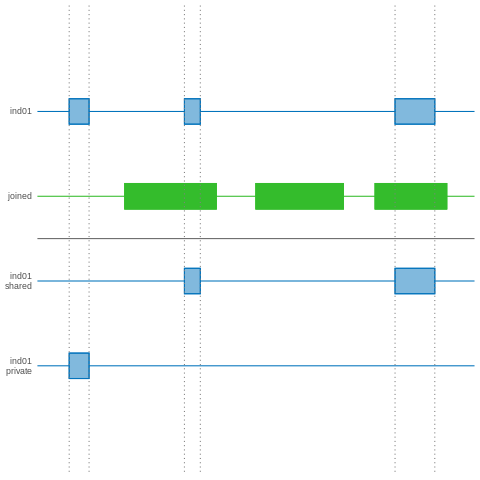

In [194]:
%%R

rbind(data.frame(y = c(4),label = c("ind01"),region = c("WestEurasia"), xmin = c(3),xmax = c(8), stringsAsFactors = F),
                 c(4, "ind01",  "WestEurasia", 32, 36),
                 c(4, "ind01",  "WestEurasia", 85, 95),
                 c(3, "merged", "EastAsia", 17, 40),
                 c(3, "merged", "EastAsia", 50, 72),
                 c(3, "merged", "EastAsia", 80, 98),
                 c(2, "shared",  "WestEurasia", 32, 36),
                 c(2, "shared",  "WestEurasia", 85, 95),
                 c(1, "private", "WestEurasia",  3, 8)) %>%
    mutate(y = as.numeric(y), xmin = as.numeric(xmin), xmax = as.numeric(xmax)) %>%
    ggplot() +
    geom_hline(aes(yintercept = y, color = region), show.legend = F) +
    geom_rect(aes(xmin = xmin, xmax = xmax, ymin = y-0.15, ymax = y+0.15, color = region), fill = "white", show.legend = F) +
    geom_rect(aes(xmin = xmin, xmax = xmax, ymin = y-0.15, ymax = y+0.15, color = region, fill = region), alpha = 0.5, show.legend = F) +
    geom_rect(data = . %>% filter(label == "merged"), aes(xmin = xmin, xmax = xmax, ymin = y-0.15, ymax = y+0.15, color = region, fill = region), show.legend = F) +
    geom_vline(data = . %>% filter(label == "ind01"), aes(xintercept = xmax), linetype = "dotted", color = "gray50") +
    geom_vline(data = . %>% filter(label == "ind01"), aes(xintercept = xmin), linetype = "dotted", color = "gray50") +
    xlim(c(0, 100)) +
    scale_fill_manual(values = reg_colors) +
    scale_color_manual(values = reg_colors) +
    scale_y_continuous(labels = c(" ", "ind01\nprivate", "ind01\nshared", "joined", "ind01", " "), limits = c(0, 5)) +
    geom_hline(yintercept = 2.5, color = "gray40") +
    theme_classic() +
    theme(axis.line = element_blank(), axis.ticks = element_blank(), axis.text.x = element_blank()) -> ExtFig2c

ExtFig2c

##### Extended Figure 2d

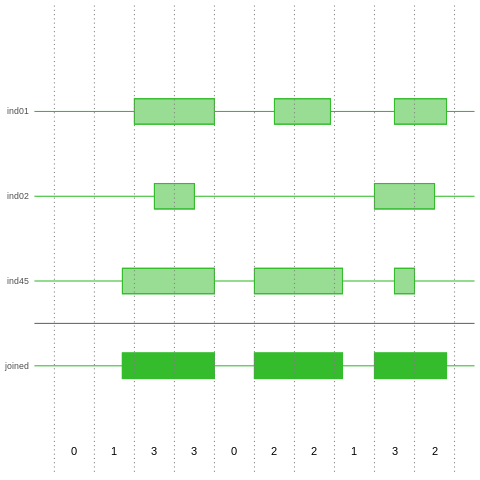

In [188]:
%%R

rbind(data.frame(y = c(4),label = c("ind01"),region = c("EastAsia"), xmin = c(20),xmax = c(40), stringsAsFactors = F),
                 c(4, "ind01",  "EastAsia", 55, 69),
                 c(4, "ind01",  "EastAsia", 85, 98),
                 c(3, "ind02",  "EastAsia", 25, 35),
                 c(3, "ind02",  "EastAsia", 80, 95),
                 c(2, "ind45",  "EastAsia", 17, 40),
                 c(2, "ind45",  "EastAsia", 50, 72),
                 c(2, "ind45",  "EastAsia", 85, 90),
                 c(1, "merged", "EastAsia", 17, 40),
                 c(1, "merged", "EastAsia", 50, 72),
                 c(1, "merged", "EastAsia", 80, 98)) %>%
    mutate(y = as.numeric(y), xmin = as.numeric(xmin), xmax = as.numeric(xmax)) %>%
    ggplot() +
    geom_hline(aes(yintercept = y, color = region), show.legend = F) +
    geom_rect(aes(xmin = xmin, xmax = xmax, ymin = y-0.15, ymax = y+0.15, color = region), fill = "white", show.legend = F) +
    geom_rect(aes(xmin = xmin, xmax = xmax, ymin = y-0.15, ymax = y+0.15, color = region, fill = region), alpha = 0.5, show.legend = F) +
    geom_rect(data = . %>% filter(label == "merged"), aes(xmin = xmin, xmax = xmax, ymin = y-0.15, ymax = y+0.15, color = region, fill = region), show.legend = F) +
    geom_vline(aes(xintercept = seq(0, 100, 10)), linetype = "dotted", color = "gray50") +
    xlim(c(0, 100)) +
    scale_fill_manual(values = reg_colors) +
    scale_color_manual(values = reg_colors) +
    scale_y_continuous(labels = c("", "joined", "ind45", "ind02", "ind01", ""), limits = c(0, 5)) +
    geom_hline(yintercept = 1.5, color = "gray40") +
    geom_text(data = data.frame(lab = c(0, 1, 3, 3, 0, 2, 2, 1, 3, 2), x = seq(5, 95, 10)), aes(x = x, y = 0, label = lab)) +
    theme_classic() +
    theme(axis.line = element_blank(), axis.ticks = element_blank(), axis.text.x = element_blank(), axis.title = element_blank()) -> ExtFig2d

ExtFig2d

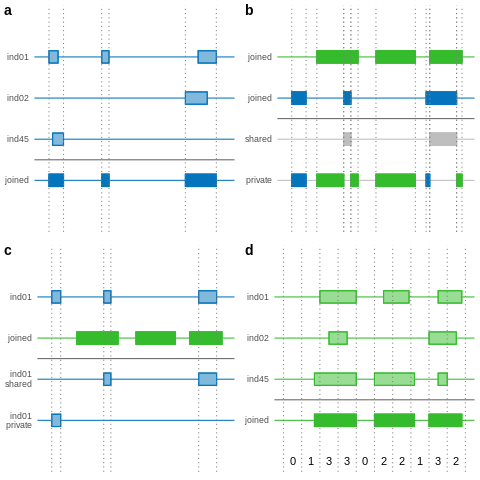

In [196]:
%%R

plot_grid(ExtFig2a, ExtFig2b, ExtFig2c, ExtFig2d, labels = c("a", "b", "c", "d")) -> ExtFig2

ggsave("ExtendedFigure2.pdf",  width = 18, height = 8, units = "cm")

ExtFig2

<a name="ExtFig3"></a>
#### Extended Figure 3

In [ ]:
is_not_callable = False
character_num   = 0
start           = 0

bases = ["A", "T", "C", "G"]

out = open("hg19_noncall.bed", "w")

with open("Href.fa", "r") as file:
        for line in file:
                if line.strip()[0] == ">":
                        if is_not_callable:
                                out.write("{}\t{}\t{}\n".format(chrom, start, character_num))
                        chrom = line.strip().split(" ")[0][1:]
                        is_not_callable = False
                        character_num   = 0
                        start           = 0
                else:
                        for character in line.strip():
                                if character not in bases and not is_not_callable:
                                        is_not_callable = True
                                        start = character_num
                                if character in bases and is_not_callable:
                                        out.write("{}\t{}\t{}\n".format(chrom, start, character_num))
                                        is_not_callable = False
                                character_num += 1

if is_not_callable:
        out.write("{}\t{}\t{}\n".format(chrom, start, character_num))

out.close()

In [351]:
prev_chrom = ""
prev_end   = 0
with open("archaicfragments_freq_WEEA_all_fragments_plot.txt", "w") as out: 
    with open("archaicfragments_freq_WEEA_all_fragments.txt") as file:
        for i, line in enumerate(file):
            if not i:
                out.write(line)
            else:
                chrom, start, end, freq, region = line.strip().split()
                start = int(start)
                if chrom != prev_chrom:
                    prev_chrom = chrom
                    prev_end   = 0
                if prev_end != start:
                    if prev_end:
                        out.write("\t".join([chrom, str(prev_end), str(prev_end+1000), "0", region])+"\n")
                    out.write("\t".join([chrom, str(start-1000), str(start), "0", region])+"\n")
                prev_end = int(end)
                out.write(line)
        out.write("\t".join([chrom, str(prev_end), str(prev_end-1000), "0", region])+"\n")

In [6]:
%%R

data.frame(chrom = -1:-23, 
           chrom_len = c(249250621, 243199373, 198022430, 191154276, 180915260, 171115067, 159138663, 146364022, 141213431, 135534747, 135006516, 
                         133851895, 115169878, 107349540, 102531392, 90354753,   81195210,  78077248,  59128983,  63025520,  48129895,  51304566, 
                         155270560)) -> chrom_len

read.table("hg19_noncall.bed", col.names = c("chrom", "start", "end")) %>% 
    filter(chrom %in% c(as.character(1:22), "X"), end-start > 25000) %>%
    mutate(chrom = -1*as.numeric(factor(chrom, c(as.character(1:22), "X")))) -> non_callable

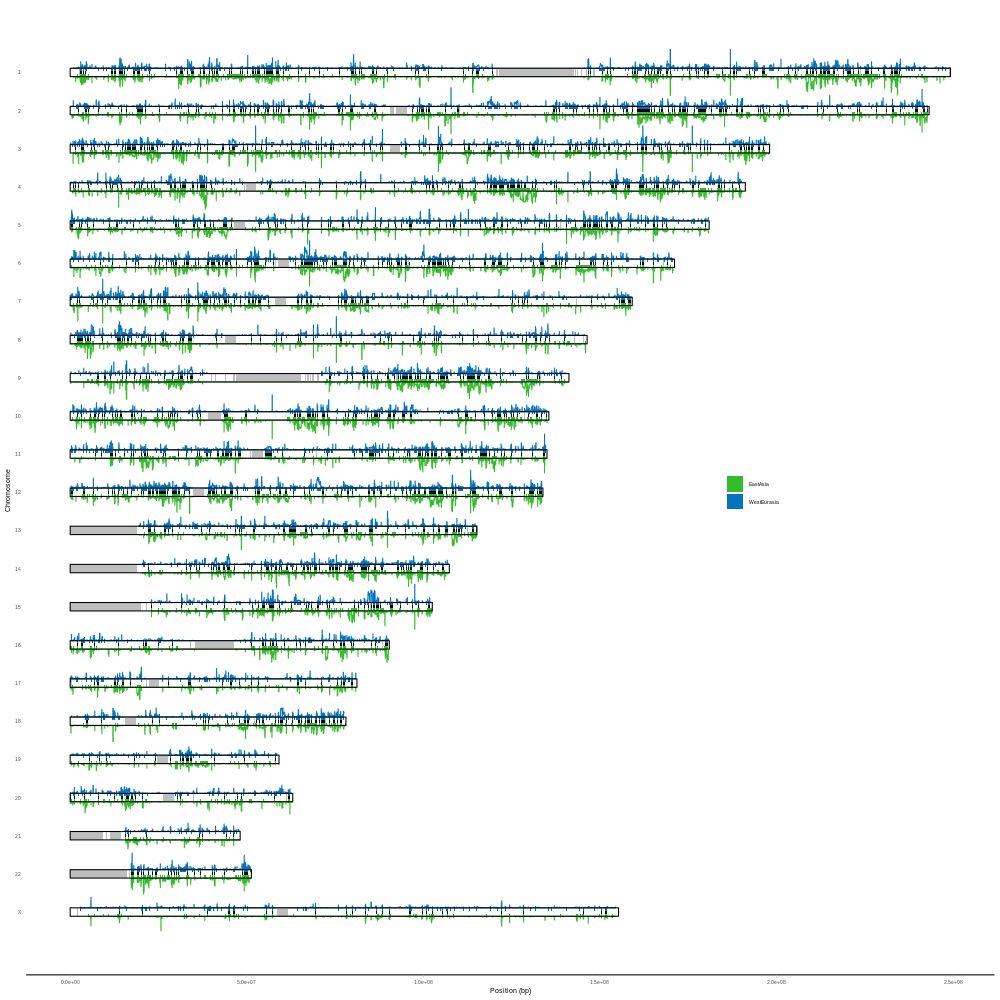

In [34]:
%%R -h 1000 -w 1000

middle = 4
joined = 7
total  = 60

read.table("archaicfragments_joined_WE.bed",   col.names = c("chrom", "start", "end")) %>% mutate(chrom = -100*as.numeric(factor(chrom, c(as.character(1:22), "X")))) %>% mutate(chrom = chrom+(middle+joined), region = "WestEurasia") -> joinedWE
read.table("archaicfragments_joined_EA.bed",   col.names = c("chrom", "start", "end")) %>% mutate(chrom = -100*as.numeric(factor(chrom, c(as.character(1:22), "X")))) %>% mutate(chrom = chrom-(middle+joined), region = "EastAsia")    -> joinedEA
read.table("archaicfragments_shared_WEEA.bed", col.names = c("chrom", "start", "end")) %>% mutate(chrom = -100*as.numeric(factor(chrom, c(as.character(1:22), "X")))) -> sharedWEEA

read.table("archaicfragments_freq_WEEA_all_fragments_plot.txt", header = T) %>% 
    mutate(chrom = -100*as.numeric(factor(chrom, c(as.character(1:22), "X")))) %>%
    mutate(freq = ifelse(region == "WestEurasia", ((freq*(total-(middle+joined))/45)+(middle+joined))+chrom,   (-1*(freq*(total-(middle+joined))/45)-(middle+joined))+chrom)) %>%
    ggplot() +
    geom_line(data = . %>% filter(region == "WestEurasia"), aes(x = start+500, y = freq, color = region, group = chrom)) +
    geom_line(data = . %>% filter(region == "EastAsia"),    aes(x = start+500, y = freq, color = region, group = chrom)) +
    geom_rect(data = joinedWE,     aes(xmin = start, xmax = end,       ymin = chrom-joined,                ymax = chrom,                        fill = region)) +
    geom_rect(data = joinedEA,     aes(xmin = start, xmax = end,       ymin = chrom+joined,                ymax = chrom,                        fill = region)) +
    geom_rect(data = sharedWEEA,   aes(xmin = start, xmax = end,       ymin = chrom+middle,                ymax = chrom-middle),                fill = "black") +
    geom_rect(data = non_callable, aes(xmin = start, xmax = end,       ymin = 100*chrom-(middle+joined),   ymax = 100*chrom+(middle+joined)),   fill = "gray") +
    geom_rect(data = chrom_len,    aes(xmin = 0,     xmax = chrom_len, ymin = (100*chrom)+(middle+joined), ymax = (100*chrom)-(middle+joined)), color = "black", alpha = 0, size = 0.5) +
    theme(panel.grid = element_blank(), axis.ticks.y= element_blank(),  axis.line.x= element_line(colour = "black"), 
          panel.border = element_blank(), legend.position = c(0.75, 0.5), legend.title=element_blank()) +
    scale_y_continuous(breaks = (c(1:23)*-100), labels = c(1:22, "X")) +
    scale_fill_manual(values = reg_colors) +
    scale_color_manual(values = reg_colors) +
    xlab("Position (bp)") +
    ylab("Chromosome") -> ExtFig3

ExtFig3
    
ggsave("ExtendedFigure3.pdf",  width = 19, height = 19, units = "cm") 

ExtFig3

[<img src="arrow.png" width="100" style="float: left;">](#HomeHome) &nbsp;

&nbsp;

<a name="SupFig"></a>
### C. Supplementary Figures

<a name="SupFig1"></a>
#### SI Figure 1

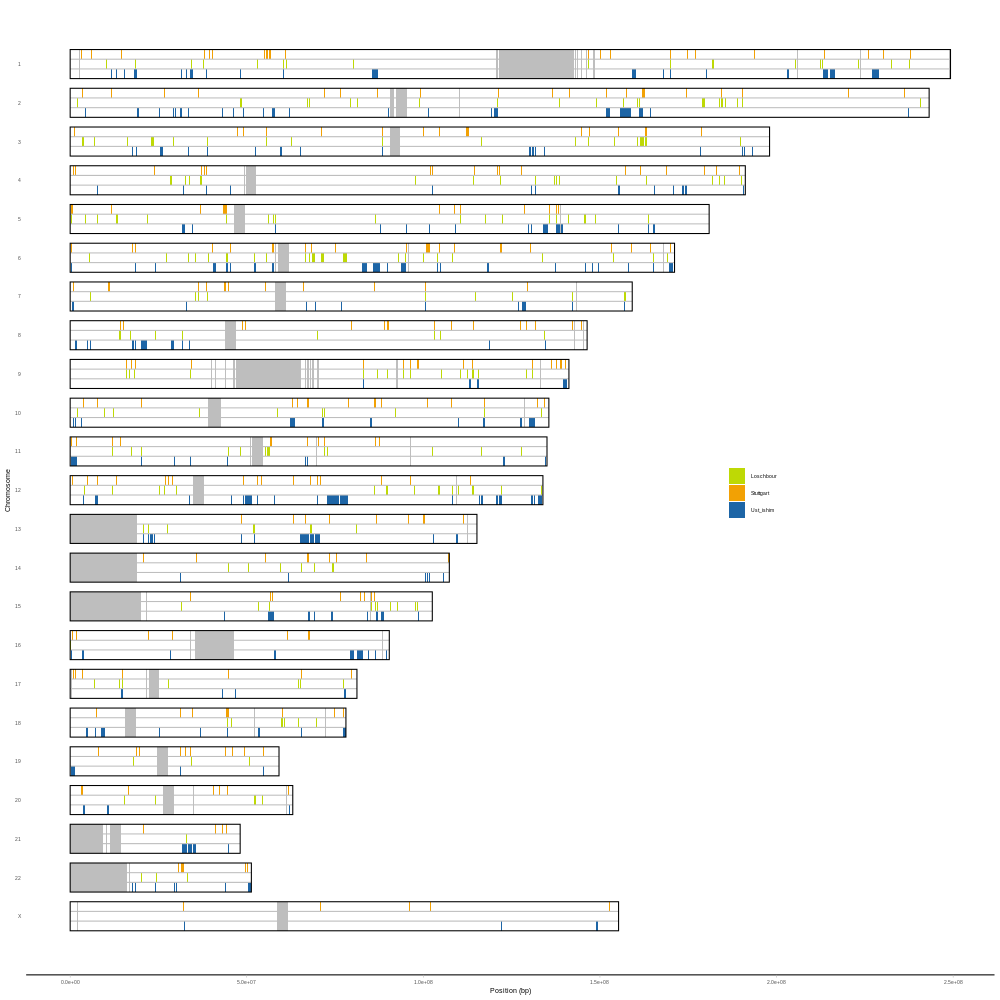

In [298]:
%%R -w 1000 -h 1000

read.table("Data1_archaicfragments.txt", header = T) %>%
    filter(name %in% c("Ust_ishim", "Loschbour", "Stuttgart")) %>%
    mutate(chrom = -1*as.numeric(factor(chrom, c(as.character(1:22), "X"))),
           chrom = ifelse(name == "Ust_ishim", chrom-0.5, ifelse(name == "Loschbour", chrom-0.25, chrom))) %>%
    ggplot() +
    geom_rect(aes(xmin = start, xmax = end, ymin = chrom, ymax = chrom-0.25, fill = name)) +
    geom_rect(data = non_callable, aes(xmin = start, xmax = end, ymin = chrom, ymax = chrom-0.75), fill = "gray") +
    geom_segment(data = chrom_len, aes(x = 0,    xend = chrom_len, y    = chrom-0.25, yend = chrom-0.25),  color = "gray") +
    geom_segment(data = chrom_len, aes(x = 0,    xend = chrom_len, y    = chrom-0.50, yend = chrom-0.50) , color = "gray") +
    geom_rect(data    = chrom_len, aes(xmin = 0, xmax = chrom_len, ymin = chrom-0.75, ymax = chrom),       color = "black", alpha = 0) +
    theme(panel.grid = element_blank(), axis.ticks.y= element_blank(),  axis.line.x= element_line(colour = "black"), 
          panel.border = element_blank(), legend.position = c(0.75, 0.5), legend.title=element_blank()) +
    scale_y_continuous(breaks = seq(-1.375, -23.375, -1), labels = c(1:22, "X"))  +
    xlab("Position (bp)") +
    ylab("Chromosome") +
    scale_fill_manual(values = c("Ust_ishim" = "#1D65A6", "Loschbour" = "#BED905", "Stuttgart" = "#F2A104")) -> SIFig1

    SIFig1
    
ggsave("SIFig1.pdf",  width = 19, height = 19, units = "cm") 

SIFig1

<a name="SupFig2"></a>
#### SI Figure 2

##### SI Figure 2a

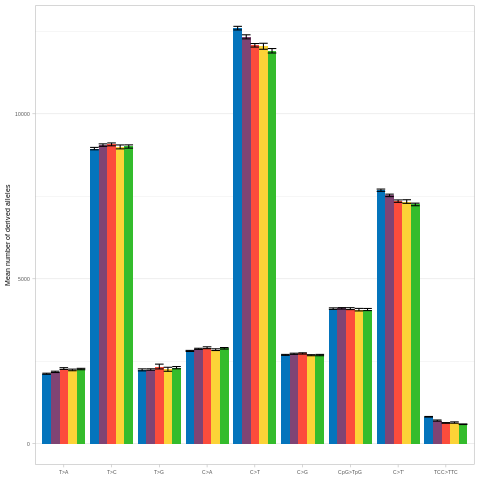

In [34]:
%%R

mutation_spectrum_pereg <- function(){
    read.table("SITab7.txt", header = T) %>% 
        gather("mut_stat", "value", 2:37) %>%
        separate(mut_stat, c("mutation", "countfrac", "stat"), sep = "_") %>%
        spread(stat, value) %>%
        filter(countfrac == "counts") %>%
        select(-c(countfrac)) %>%
        mutate(mutation = str_replace(mutation, "\\.", ">"),
               mutation = str_replace(mutation, "\\.", "'"),
               mutation = factor(mutation, levels = c("T>A", "T>C", "T>G", "C>A", "C>T", "C>G", "CpG>TpG", "C>T'", "TCC>TTC")),
               reg = factor(reg, levels = c("WestEurasia", "SouthAsia", "America", "CentralAsiaSiberia", "EastAsia")))
}


mutation_spectrum_pereg() %>%
    ggplot() +
    geom_bar(stat = "identity", aes(x = mutation, y = mean,                fill = reg), position = position_dodge()) +
    geom_errorbar(              aes(x = mutation, ymin = mean-(1.96*se), ymax = mean+(1.96*se), group = reg), position = position_dodge()) +
    ylab("Mean number of derived alleles") +
    theme(axis.title.x = element_blank(),panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), legend.position = "none") +
    scale_fill_manual(values = reg_colors) -> SIFig2a
    
SIFig2a

##### SI Figure 2b

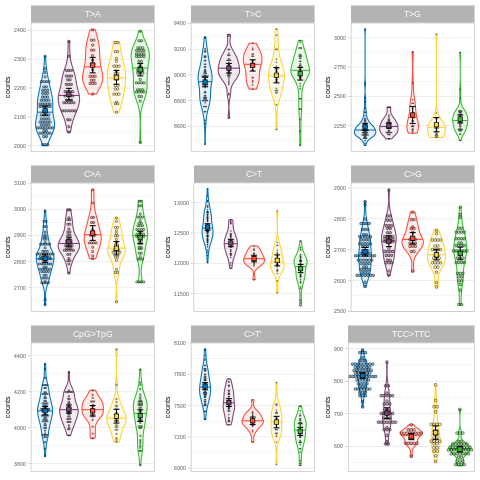

In [27]:
%%R

plot_mutation_spectrum_dist <- function(mut){
   mutation_spectrum_mean_len_perind() %>%
    filter(mutation == mut) %>%
    mutate(reg = factor(reg, levels = c("WestEurasia", "SouthAsia", "America", "CentralAsiaSiberia", "EastAsia"))) %>% 
    ggplot() +
    geom_violin(aes(x = reg, y = counts, color = reg, fill = reg), alpha = 0.1, draw_quantiles = c(0.5)) +
    geom_dotplot(aes(y = counts, x = reg, fill = reg), binaxis = "y", stackdir='center', dotsize = 1, alpha = 0.5, 
                 binwidth = mutation_spectrum_mean_len_perind() %>% filter(mutation == "C>A") %>% summarize(binwidth = (max(counts)-min(counts))/50) %>% pull(binwidth)) +

    geom_errorbar(data = mutation_spectrum_pereg() %>% filter(mutation == mut), aes(x = reg, ymin = mean-(1.96*se), ymax = mean+(1.96*se)), width = 0.25, size = 0.5) +
    geom_point(data = mutation_spectrum_pereg() %>% filter(mutation == mut),    aes(x = reg, y = mean, fill = reg), color = "black", size = 2, shape = 22) +

    scale_color_manual(values = reg_colors)+
    scale_fill_manual(values = reg_colors) +
    theme(legend.title = element_blank(), axis.text.x = element_blank(), axis.ticks.x = element_blank(), axis.title.x = element_blank(),
          panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), legend.position = "none") +
    facet_wrap(.~mutation) 
}

plot_grid(plot_mutation_spectrum_dist("T>A"), 
          plot_mutation_spectrum_dist("T>C"),
          plot_mutation_spectrum_dist("T>G"),
          plot_mutation_spectrum_dist("C>A"),
          plot_mutation_spectrum_dist("C>T"),
          plot_mutation_spectrum_dist("C>G"),
          plot_mutation_spectrum_dist("CpG>TpG"),
          plot_mutation_spectrum_dist("C>T'"),
          plot_mutation_spectrum_dist("TCC>TTC"), nrow = 3) -> SIFig2b
    
SIFig2b

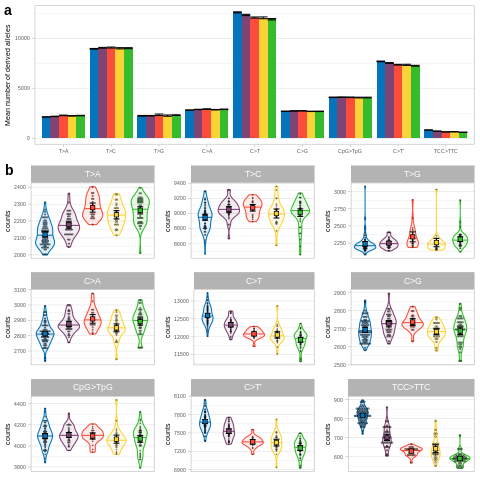

In [35]:
%%R

plot_grid(SIFig2a , SIFig2b, labels = c("a", "b"), rel_heights = c(1.5, 3), ncol = 1) -> SIFig2

SIFig2

ggsave("SIFig2.pdf",  width = 18, height = 20, units = "cm")

SIFig2

<a name="SupFig3"></a>
#### SI Figure 3

<a name="SupFig4"></a>
#### SI Figure 4


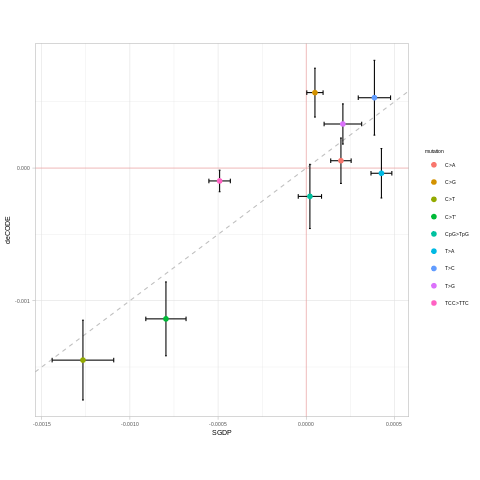

In [29]:
%%R

read.table("SITab8.txt", header = T) %>% 
    filter(coefficient == "slope") %>%
    select(mutation, data_set, estimate, std) %>%
    gather("stat", "value", estimate, std) %>%
    unite("stat", data_set, stat) %>%
    spread(stat, value) %>%
    ggplot() +
    geom_hline(yintercept = 0, color = "red", alpha = 0.2) +
    geom_vline(xintercept = 0, color = "red", alpha = 0.2) +
    geom_abline(intercept = 0, slope = 1, color = "gray", linetype = "dashed") +
    geom_errorbar( aes(x = SGDP_estimate,   ymax = deCODE_estimate+(1.96*deCODE_std), ymin = deCODE_estimate-(1.96*deCODE_std))) +
    geom_errorbarh(aes(y = deCODE_estimate, xmax = SGDP_estimate+(1.96*SGDP_std),     xmin = SGDP_estimate-(1.96*SGDP_std))) +
    geom_point(aes(x = SGDP_estimate, y = deCODE_estimate, color = mutation), size = 2) +
    theme(aspect.ratio =  1) +
    xlab("SGDP") +
    ylab("deCODE") -> SIFig4
    
SIFig4

ggsave("SIFig4.pdf",  width = 8, height = 8, units = "cm")

SIFig4

<a name="SupFig5"></a>
#### SI Figure 5

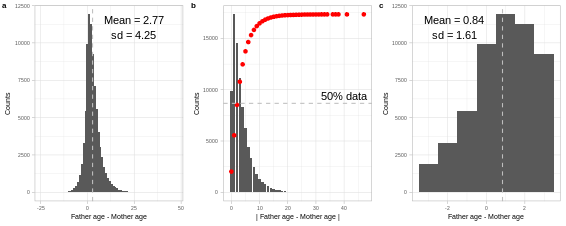

In [27]:
%%R -w 20 -h 8 -u cm

plot_grid(read.table("aau1043_DataS7.tsv", header = T, sep = "\t") %>%
  filter(!is.na(Mother_age), !is.na(Father_age)) %>%
  ggplot() +
  geom_histogram(aes(x = Father_age-Mother_age), binwidth = 1) +
  geom_vline(data = . %>% summarise(mean = mean(Father_age-Mother_age)), aes(xintercept = mean), linetype = "dashed", color = "gray") +
  geom_text(data = . %>% summarise(mean = mean(Father_age-Mother_age)), aes(x = mean+22, y = 11500, label = paste("Mean = ", round(mean, digits = 2), sep = ""))) +
  geom_text(data = . %>% summarise(mean = mean(Father_age-Mother_age), sd = sd(Father_age-Mother_age)), aes(x = mean+22, y = 10500, label = paste("sd = ", round(sd, digits = 2), sep = ""))) +
  ylab("Counts") +
  xlab("Father age - Mother age"),

read.table("aau1043_DataS7.tsv", header = T, sep = "\t") %>%
  filter(!is.na(Mother_age), !is.na(Father_age)) %>%
  mutate(diff = abs(Father_age-Mother_age)) %>%
  count(diff) %>%
  mutate(perc = (100*cumsum(n))/sum(n),
         plot = (perc/100)*max(n))  %>%
  ggplot() +
  geom_bar(stat = "identity", aes(y = n, x = diff)) +
  geom_point(aes(x = diff, y = plot), color = "red") +
  geom_hline(aes(yintercept = max(n)/2), linetype = "dashed", color = "gray") +
  geom_text(data = . %>% summarize(y = max(n)/2), aes(y = y+750, x = 40, label = "50% data")) +
  ylab("Counts") +
  xlab("| Father age - Mother age |"),

read.table("aau1043_DataS7.tsv", header = T, sep = "\t") %>%
  filter(!is.na(Mother_age), !is.na(Father_age), abs(Father_age-Mother_age) < 4) %>%
  ggplot() +
  geom_histogram(aes(x = Father_age-Mother_age), binwidth = 1) +
  geom_vline(data = . %>% summarise(mean = mean(Father_age-Mother_age)), aes(xintercept = mean), linetype = "dashed", color = "gray") +
  geom_text(data = . %>% summarise(mean = mean(Father_age-Mother_age)), aes(x = mean-2.5, y = 11500, label = paste("Mean = ", round(mean, digits = 2), sep = ""))) +
  geom_text(data = . %>% summarise(mean = mean(Father_age-Mother_age), sd = sd(Father_age-Mother_age)), aes(x = mean-2.5, y = 10500, label = paste("sd = ", round(sd, digits = 2), sep = ""))) +
  ylab("Counts") +
  xlab("Father age - Mother age"), labels = "auto", nrow = 1, label_size = 8, label_fontfamily = "Helvetica") -> SIFig5

SIFig5

ggsave("SIFig5.pdf",  width = 17, height = 7, units = "cm")

SIFig5

<a name="SupFig6"></a>
#### SI Figure 6

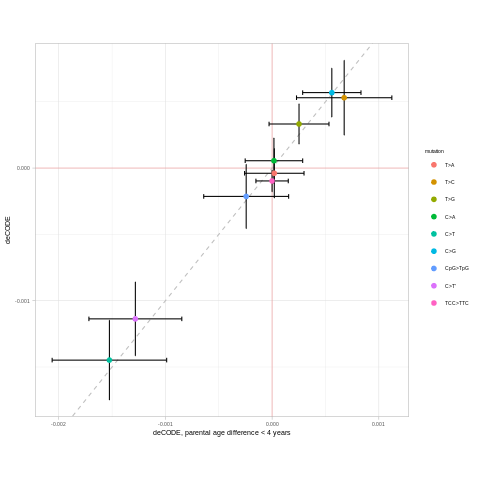

In [26]:
%%R

linear_model_table(list(deCODE_mutation_spectrum_mean_age(), deCODE_mutation_spectrum_mean_age(min_probands = 2, max_age_diff = 4)), c("deCODE_0",    "deCODE_4")) %>%
    mutate(mutation = factor(mutation, levels = c("T>A", "T>C", "T>G", "C>A", "C>T", "C>G", "CpG>TpG", "C>T'", "TCC>TTC"))) %>%
    arrange(coefficient, mutation, data_set) %>%
    select(coefficient, mutation, data_set, estimate, std, t_val, p_val) %>%
    gather(stat, value, 4:7) %>%
    spread(stat, value) %>%
    select(coefficient, mutation, data_set, estimate, std, t_val, p_val) %>%
    filter(coefficient == "slope") %>%
    select(mutation, data_set, estimate, std) %>%
    gather("stat", "value", estimate, std) %>%
    unite("stat", data_set, stat) %>%
    spread(stat, value) %>%
    ggplot() +
    geom_hline(yintercept = 0, color = "red", alpha = 0.2) +
    geom_vline(xintercept = 0, color = "red", alpha = 0.2) +
    geom_abline(intercept = 0, slope = 1, color = "gray", linetype = "dashed") +
    geom_errorbar( aes(x = deCODE_4_estimate, ymax = deCODE_0_estimate+(1.96*deCODE_0_std), ymin = deCODE_0_estimate-(1.96*deCODE_0_std))) +
    geom_errorbarh(aes(y = deCODE_0_estimate, xmax = deCODE_4_estimate+(1.96*deCODE_4_std), xmin = deCODE_4_estimate-(1.96*deCODE_4_std))) +
    geom_point(aes(x = deCODE_4_estimate, y = deCODE_0_estimate, color = mutation), size = 2) +
    theme(aspect.ratio =  1) +
    xlab("deCODE, parental age difference < 4 years") +
    ylab("deCODE") -> SIFig6
    
SIFig6

ggsave("SIFig6.pdf",  width = 8, height = 8, units = "cm")

SIFig6

<a name="SupFig7"></a>
#### SI Figure 7

In [15]:
%%R

read.table("Data2_mutation_spectrum.txt", header = T) %>% head()

            ind                reg sex chrom fiv anc thr der counts
1 S_Abkhasian-1        WestEurasia   M     1   A   C   A   A     17
2 S_Abkhasian-2        WestEurasia   M     1   A   C   A   A     13
3    S_Adygei-1        WestEurasia   M     1   A   C   A   A     21
4    S_Adygei-2        WestEurasia   F     1   A   C   A   A     24
5  S_Albanian-1        WestEurasia   F     1   A   C   A   A     27
6     S_Aleut-1 CentralAsiaSiberia   M     1   A   C   A   A     17


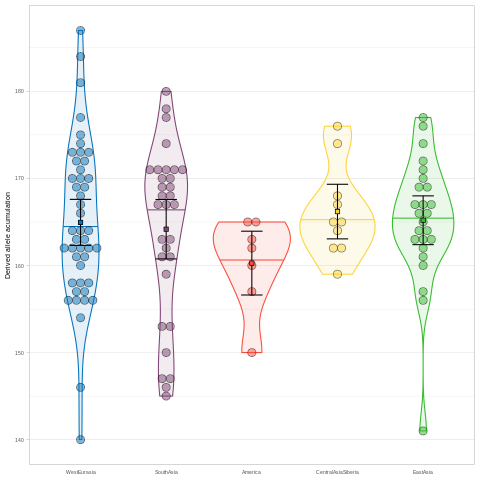

In [19]:
%%R

read.table("Data2_mutation_spectrum.txt", header = T) %>% filter(chrom == "Y") %>% group_by(ind, reg) %>% summarise(counts = sum(counts)) %>% ungroup() %>% pull(counts) %>% max() -> max_plot
read.table("Data2_mutation_spectrum.txt", header = T) %>% filter(chrom == "Y") %>% group_by(ind, reg) %>% summarise(counts = sum(counts)) %>% ungroup() %>% pull(counts) %>% min() -> min_plot


read.table("Data2_mutation_spectrum.txt", header = T) %>%
    filter(chrom == "Y") %>%
    group_by(ind, reg) %>%
    summarise(counts = sum(counts)) %>%
    ungroup() %>%
    mutate(reg = factor(reg, levels = c("WestEurasia", "SouthAsia", "America", "CentralAsiaSiberia", "EastAsia"))) %>% 
    ggplot() +
    geom_violin(aes(x = reg, y = counts, color = reg, fill = reg), alpha = 0.1, draw_quantiles = c(0.5)) +
    geom_dotplot(aes(y = counts, x = reg, fill = reg), binaxis = "y", stackdir='center', dotsize = 1, binwidth = (max_plot-min_plot)/50, alpha = 0.5) +
    ylab("Derived allele acumulation") +
    theme(legend.title = element_blank(), axis.ticks.x = element_blank(), axis.title.x = element_blank(),
          panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), legend.position = "none") +
    scale_color_manual(values = reg_colors)+
    scale_fill_manual(values = reg_colors) +
    geom_errorbar(data = read.table("SITab10.txt", header =  T), aes(x = reg, ymin = derallele_mean-(1.96*derallele_se), ymax = derallele_mean+(1.96*derallele_se)), width = 0.25, size = 0.5) +
    geom_point(data = read.table("SITab10.txt", header =  T), aes(x = reg, y = derallele_mean, fill = reg), color = "black", size = 2, shape = 22)  -> SIFig7

SIFig7
    
ggsave("SIFig7.pdf", width = 8, height = 4, units = "cm")

SIFig7

[<img src="arrow.png" width="100" style="float: left;">](#HomeHome) &nbsp;

&nbsp;


<a name="Sta"></a>
## 4. Statistical tests
<a name="Sta1"></a>
### A. Difference average archaic fragment length among regions

In [379]:
archfrag_mean_len_perind = %R archaicfragmentstatisticsperind() %>% ungroup() %>% select(group = region, value = mean_len)
archfrag_mean_len_perind

,group,value
1,WestEurasia,73479.708637
2,WestEurasia,73061.889251
3,WestEurasia,75186.897881
4,WestEurasia,75672.380952
5,WestEurasia,78357.217030
...,...,...
198,WestEurasia,75183.457052
199,EastAsia,80335.557674
200,EastAsia,82528.365792
201,America,75568.083261


In [380]:
Fobs, p = permutation_fstat(archfrag_mean_len_perind, 100000)
print("Fobs    = {}".format(Fobs))
print("P value = {}".format(p/100000))

Fobs    = 92.748106105547
P value = 0.0


<a name="Sta2"></a>
### B. Difference mean number archaic fragments among regions




In [412]:
archfrag_num_frag_perind = %R archaicfragmentstatisticsperind() %>% ungroup() %>% select(group = region, value = num_frag)
archfrag_num_frag_perind

,group,value
1,WestEurasia,961
2,WestEurasia,921
3,WestEurasia,1038
4,WestEurasia,1050
5,WestEurasia,963
...,...,...
198,WestEurasia,943
199,EastAsia,1049
200,EastAsia,1181
201,America,1153


In [413]:
Fobs, p = permutation_fstat(archfrag_num_frag_perind, 100000)
print("Fobs    = {}".format(Fobs))
print("P value = {}".format(p/100000))

Fobs    = 90.02644219860417
P value = 0.0


<a name="Sta3"></a>
### C. Difference mean archaic sequence among regions 

In [414]:
archfrag_arch_seq_perind = %R archaicfragmentstatisticsperind() %>% ungroup() %>% select(group = region, value = arch_seq)
archfrag_arch_seq_perind

,group,value
1,WestEurasia,70614000
2,WestEurasia,67290000
3,WestEurasia,78044000
4,WestEurasia,79456000
5,WestEurasia,75458000
...,...,...
198,WestEurasia,70898000
199,EastAsia,84272000
200,EastAsia,97466000
201,America,87130000


In [415]:
Fobs, p = permutation_fstat(archfrag_arch_seq_perind, 100000)
print("Fobs    = {}".format(Fobs))
print("P value = {}".format(p/100000))

Fobs    = 133.029907805895
P value = 0.0


<a name="Sta4"></a>
### D. Difference average overlapping archaic fragment length among West Eurasians and East Asians

In [8]:
archfrag_mean_len_perind_shared_WEEA = %R read.table("archaicfragments_ind_shared_WEEA.txt", header = T) %>% group_by(name, region) %>% summarize(mean_len = mean(length)) %>% ungroup() %>% select(group = region, value = mean_len)
archfrag_mean_len_perind_shared_WEEA

,group,value
1,WestEurasia,80126.649077
2,WestEurasia,81693.181818
3,WestEurasia,81943.902439
4,WestEurasia,86032.042724
5,EastAsia,88361.268403
...,...,...
86,EastAsia,90859.913793
87,EastAsia,90319.735391
88,WestEurasia,73782.481752
89,EastAsia,89043.209877


In [9]:
diffobs, p = permutation_two_group_diff(archfrag_mean_len_perind_shared_WEEA, 100000)
print("diffobs = {}".format(diffobs))
print("P value = {}".format(p*2/100000))

diffobs = -10387.481881864747
P value = 0.0


<a name="Sta5"></a>
### E. Difference accumulation of derived alleles among regions

In [215]:
derallel_perind = %R read.table("Data2_mutation_spectrum.txt", header = T) %>% filter(chrom != "X", chrom != "Y") %>% group_by(ind, reg) %>% summarize(counts = sum(counts)) %>% ungroup() %>% select(group = reg, value = counts)

derallel_perind

,group,value
1,WestEurasia,30491
2,WestEurasia,30920
3,WestEurasia,32200
4,WestEurasia,32463
5,WestEurasia,31007
...,...,...
198,WestEurasia,31425
199,EastAsia,29398
200,EastAsia,30189
201,America,31483


In [216]:
Fobs, p = permutation_fstat(derallel_perind, 100000)
print("Fobs    = {}".format(Fobs))
print("P value = {}".format(p/100000))

Fobs    = 5.73687762592627
P value = 0.00028


<a name="Sta6"></a>
### F. Difference accumulation of derived alleles among West Eurasians and East Asians



In [229]:
derallel_perind_WE_EA = %R read.table("Data2_mutation_spectrum.txt", header = T) %>% filter(chrom != "X", chrom != "Y", reg %in% c("WestEurasia", "EastAsia")) %>% group_by(ind, reg) %>% summarize(counts = sum(counts)) %>% ungroup() %>% select(group = reg, value = counts) %>% mutate(group = as.character(group))

derallel_perind_WE_EA

,group,value
1,WestEurasia,30491
2,WestEurasia,30920
3,WestEurasia,32200
4,WestEurasia,32463
5,WestEurasia,31007
...,...,...
112,EastAsia,31067
113,WestEurasia,31496
114,WestEurasia,31425
115,EastAsia,29398


In [238]:
diffobs, p = permutation_two_group_diff(derallel_perind_WE_EA, 100000)
print("diffobs = {}".format(diffobs))
print("P value = {}".format(p*2/100000))

diffobs = 338.20907668231666
P value = 0.00118


<a name="Sta7"></a>
### G. Difference X-to-A ratio among regions

In [228]:
X_to_A_ratio_perind = %R X_to_A_ratio_perind() %>% ungroup() %>% select(group = reg, value = ratio)

X_to_A_ratio_perind

,group,value
1,WestEurasia,0.774969
2,WestEurasia,0.899544
3,CentralAsiaSiberia,0.829191
4,WestEurasia,0.770934
5,WestEurasia,0.833592
...,...,...
76,CentralAsiaSiberia,0.867239
77,EastAsia,0.867482
78,CentralAsiaSiberia,0.818291
79,WestEurasia,0.778728


In [229]:
Fobs, p = permutation_fstat(X_to_A_ratio_perind, 100000)
print("Fobs    = {}".format(Fobs))
print("P value = {}".format(p/100000))

Fobs    = 5.657711298590471
P value = 0.00036


<a name="Sta8"></a>
### H. Difference CGenrichment ratio among regions

In [231]:
CGenrichment_perind = %R CGenrichment_perind() %>% ungroup() %>% select(group = reg, value = ratio)

CGenrichment_perind

,group,value
1,WestEurasia,1.359162
2,WestEurasia,1.347497
3,WestEurasia,1.357624
4,WestEurasia,1.314715
5,WestEurasia,1.314628
...,...,...
198,WestEurasia,1.335050
199,EastAsia,1.521676
200,EastAsia,1.408892
201,America,1.413611


In [232]:
Fobs, p = permutation_fstat(CGenrichment_perind, 100000)
print("Fobs    = {}".format(Fobs))
print("P value = {}".format(p/100000))

Fobs    = 4.193996425536348
P value = 0.00277


<a name="Sta9"></a>
### I. Difference accumulation of derived alleles on Y chromosome among regions

In [219]:
derallel_perind_Y = %R read.table("Data2_mutation_spectrum.txt", header = T) %>% filter(chrom == "Y") %>% group_by(ind, reg) %>% summarize(counts = sum(counts)) %>% ungroup() %>% select(group = reg, value = counts)

derallel_perind_Y

,group,value
1,WestEurasia,173
2,WestEurasia,154
3,WestEurasia,167
4,CentralAsiaSiberia,176
5,CentralAsiaSiberia,162
...,...,...
114,CentralAsiaSiberia,167
115,WestEurasia,187
116,EastAsia,164
117,America,162


In [220]:
Fobs, p = permutation_fstat(derallel_perind_Y, 100000)
print("Fobs    = {}".format(Fobs))
print("P value = {}".format(p/100000))

Fobs    = 0.6005197799166269
P value = 0.66369


[<img src="arrow.png" width="100" style="float: left;">](#HomeHome) &nbsp;

&nbsp;